In [1]:
!pip install pandas sklearn matplotlib seaborn

  Using cached https://files.pythonhosted.org/packages/a8/76/220ba4420459d9c4c9c9587c6ce607bf56c25b3d3d2de62056efe482dadc/seaborn-0.9.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a0/c5/d2238762d780dde84a20b8c761f563fe882b88c5a5fb03c056547c442a19/scikit_learn-0.21.3-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/8f/42/155696f85f344c066e17af287359c9786b436b1bf86029bb3411283274f3/joblib-0.14.0-py2.py3-none-any.whl
You are using pip version 19.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import os, copy
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from datetime import date
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='font_ch.ttf', size=14)
import seaborn as sns

from sklearn.metrics import log_loss, roc_auc_score, auc, roc_curve, accuracy_score, brier_score_loss, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# 因為擬合(fit)與編碼(transform)需要分開, 因此不使用.get_dummy, 而採用 sklearn 的 OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_train = pd.read_csv('./T-BrainAI_dataset/train.csv', encoding='big5')
Y1_mapping = {
    'Y': 1,
    'N': 0
}
df_train['Y1'] = df_train['Y1'].map(Y1_mapping)
train_Y = df_train[['Y1']]
train_Y # 0:1 = 98000:2000

# train_X = df_train
train_X = df_train.drop(['CUS_ID','Y1'], axis=1)
train_X

Y1
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
...    ..
99970   0
99971   0
99972   1
99973   0
99974   0
99975   0
99976   0
99977   0
99978   0
99979   0
99980   0
99981   0
99982   0
99983   0
99984   1
99985   0
99986   0
99987   0
99988   0
99989   0
99990   0
99991   1
99992   0
99993   1
99994   0
99995   0
99996   1
99997   1
99998   0
99999   0

[100000 rows x 1 columns]

GENDER AGE CHARGE_CITY_CD CONTACT_CITY_CD  EDUCATION_CD  MARRIAGE_CD  \
0          M   低             A1              A1           NaN          NaN   
1          M   低             A1              A1           NaN          NaN   
2          M   低             A1              A1           1.0          0.0   
3          M   低             A1              A1           NaN          0.0   
4          M   低             A1              A1           1.0          0.0   
5          M   低             A1              A1           NaN          0.0   
6          M   低             A1              A1           NaN          0.0   
7          M   低             A1              A1           NaN          0.0   
8          M   低             A1              A1           1.0          0.0   
9          M   低             A1              A1           NaN          0.0   
10         M   低             A1              A1           1.0          0.0   
11         M   低             A1              A1           1.0          0.0   
12         M   低             A1              A1           NaN          0.0   
13         M   低             A1              A1           2.0          0.0   
14         M   低             A1              A1           1.0          0.0   
15         M   低             A1              A1           NaN          0.0   
16         M   低             A1              A1           NaN          0.0   
17         M   低             A2              A2           1.0          0.0   
18         M   低             A1              A1           3.0          0.0   
19         M   低             A1              A1           NaN          0.0   
20         M   低             A2              A2           NaN          0.0   
21         M   低             A1              A1           1.0          0.0   
22         M   低             A1              A1           1.0          0.0   
23         M   低             A1              A1           NaN          0.0   
24         M   低             A1              A1           NaN          0.0   
25         M   低             A1              A1           NaN          0.0   
26         M   低             A1              A1           1.0          0.0   
27         M   低             A1              A1           1.0          0.0   
28         M   低             A1              A1           NaN          0.0   
29         M   低             A1              A1           NaN          0.0   
...      ...  ..            ...             ...           ...          ...   
99970      F  中高             C1              C1           3.0          0.0   
99971      F   高             B2              B2           1.0          1.0   
99972      F   高             A1              A1           2.0          1.0   
99973      M  中高             C1              C1           2.0          1.0   
99974      M   高             C1              C1           3.0          1.0   
99975      M  中高             A2              A2           4.0          1.0   
99976      F   高             C1              C1           2.0          1.0   
99977      F   高             A2              A2           3.0          1.0   
99978      F  中高             C1              C1           2.0          1.0   
99979      M   高             A1              A1           NaN          NaN   
99980      F  中高             C2              C2           2.0          1.0   
99981      F   高             C2              C2           NaN          1.0   
99982      F   高             C2              C2           2.0          2.0   
99983      F   高             C2              C2           3.0          1.0   
99984      F   高             B1              A1           2.0          1.0   
99985      F  中高             C2              C2           3.0          1.0   
99986      M  中高             C2              C2           NaN          NaN   
99987      M  中高             C1              C1           1.0          1.0   
99988      M  中高             C2              C2           2.0          1.0   
99989      F   高            

In [4]:
df_test = pd.read_csv('./T-BrainAI_dataset/test.csv', encoding='big5')
test_X = df_test.drop('CUS_ID', axis=1)
# test_X = df_test
test_X

GENDER AGE CHARGE_CITY_CD CONTACT_CITY_CD  EDUCATION_CD  MARRIAGE_CD  \
0           M   低             A1              A1           2.0          0.0   
1           M   低             A1              A1           NaN          0.0   
2           M   低             A1              A1           1.0          0.0   
3           M   低             A1              A1           NaN          0.0   
4           M   低             A1              A1           1.0          0.0   
5           M   低             A1              A1           NaN          0.0   
6           M   低             A1              A1           NaN          0.0   
7           M   低             A1              A1           NaN          0.0   
8           M   低             A1              A1           NaN          0.0   
9           M   低             A1              A1           NaN          0.0   
10          M   低             A1              A1           1.0          0.0   
11          M   低             A1              A1           1.0          0.0   
12          M   低             A1              A1           NaN          0.0   
13          M   低             A1              A1           NaN          0.0   
14          M   低             A1              A1           1.0          0.0   
15          M   低             A1              A1           1.0          0.0   
16          M   低             A2              A2           NaN          0.0   
17          M   低             A1              A1           1.0          0.0   
18          M   低             A1              A1           NaN          0.0   
19          M   低             A1              A1           1.0          0.0   
20          M   低             A1              A1           NaN          0.0   
21          M   低             B1              B1           2.0          0.0   
22          M   低             A1              A1           1.0          0.0   
23          M   低             A1              A1           NaN          0.0   
24          M   低             A1              A1           1.0          0.0   
25          M   低             A1              A1           NaN          0.0   
26          M   低             A1              A1           NaN          0.0   
27          M   低             A1              A1           NaN          0.0   
28          M   低             A1              A1           NaN          0.0   
29          M   低             A1              A1           NaN          0.0   
...       ...  ..            ...             ...           ...          ...   
149970      M   高             B1              A1           2.0          1.0   
149971      M   高             B1              C2           2.0          1.0   
149972      M   高             B1              C2           2.0          1.0   
149973      M   高             B1              A1           3.0          1.0   
149974      M   高             B1              B2           3.0          1.0   
149975      M   高             B1              A1           3.0          1.0   
149976      M   高             B1              A2           2.0          1.0   
149977      M   高             B1               D           3.0          1.0   
149978      F   高             B1               D           2.0          2.0   
149979      F   高             B1              C1           2.0          2.0   
149980      F   高             B1               D           2.0          1.0   
149981      M   高             B1              C2           2.0          1.0   
149982      M   高             B1               D           2.0          1.0   
149983      F   高             B1              B1           1.0          1.0   
149984      M   高             B1              A1           2.0          1.0   
149985      F   高             B1              A1           3.0          1.0   
149986      F  中高             A2              A2           3.0          1.0   
149987      M   中             A1              A1           2.0          1.0   
149988      F  中高             A1              A1         

In [6]:
# PCA - train

train_X = train_X.fillna(-1)
LEncoder = LabelEncoder()
for c in train_X.columns:
    if train_X[c].dtype == 'object':
        train_X[c] = LEncoder.fit_transform(list(train_X[c].values))
# t = pd.get_dummies(train_X)
# train_X_d = pd.DataFrame(t)
# train_X_v = train_X_d.values
train_X_v = train_X.values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_X_v)
scaled_data = scaler.transform(train_X_v)

from sklearn.decomposition import PCA
pca = PCA(n_components=30)

pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
train_X_v.shape
x_pca.shape
pca.explained_variance_ratio_

StandardScaler(copy=True, with_mean=True, with_std=True)

PCA(copy=True, iterated_power='auto', n_components=30, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(100000, 130)

(100000, 30)

array([0.24606042, 0.13091421, 0.04764948, 0.03811617, 0.02798495,
       0.02643711, 0.02103889, 0.01815984, 0.01749939, 0.01557272,
       0.01432619, 0.01304991, 0.01271364, 0.01189946, 0.0110668 ,
       0.00969028, 0.00919768, 0.00890326, 0.00875673, 0.00864395,
       0.00823499, 0.00809246, 0.00791147, 0.00776658, 0.00772793,
       0.00770216, 0.00751388, 0.00738982, 0.00731119, 0.00717657])

<Figure size 576x432 with 0 Axes>

Text(0.5, 0, '1 Principle Component')

Text(0, 0.5, '2 Principle Component')

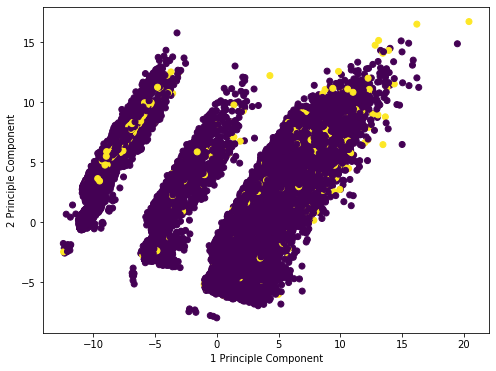

GENDER       AGE  CHARGE_CITY_CD  CONTACT_CITY_CD  EDUCATION_CD  \
0  -0.007669 -0.009668        0.010251         0.006387      0.080962   
1  -0.024011  0.026241        0.024224         0.008810      0.068016   
2  -0.041186  0.020898       -0.045079        -0.052755     -0.055089   
3   0.007488  0.017964       -0.000957        -0.009407     -0.106934   
4  -0.005186 -0.007302       -0.016359        -0.010258     -0.024343   
5  -0.006650 -0.167047       -0.012799        -0.004738      0.112141   
6  -0.003485  0.079738        0.095729         0.100993      0.082869   
7  -0.089006  0.263827       -0.041769        -0.039767     -0.175939   
8   0.034525 -0.037595        0.048488         0.051570      0.015720   
9  -0.021928 -0.087600       -0.024157        -0.022855     -0.051815   
10 -0.047355  0.181133       -0.438961        -0.428984      0.008105   
11 -0.002324 -0.187306        0.172667         0.162240     -0.102470   
12 -0.040041  0.286045        0.459757         0.470703     -0.046720   
13  0.015610 -0.161545        0.142201         0.150001      0.056922   
14  0.080780 -0.140711       -0.057777        -0.065304      0.014420   
15  0.437709 -0.025826       -0.006930        -0.003011      0.023986   
16 -0.315240  0.045539        0.042523         0.054247     -0.011639   
17 -0.173026 -0.061482        0.069043         0.071482      0.012822   
18 -0.012887 -0.085095       -0.013948        -0.021334      0.000179   
19  0.003227 -0.069551       -0.014472        -0.007392     -0.059898   
20 -0.048004  0.018986        0.001016        -0.004111      0.045701   
21 -0.023300  0.023810        0.006256         0.010782     -0.076950   
22 -0.020020  0.010976       -0.009491        -0.005731     -0.005221   
23  0.333416  0.154549       -0.011921        -0.003206     -0.124795   
24 -0.037286 -0.019355        0.000328         0.010158      0.077212   
25 -0.076205  0.015173       -0.027976        -0.039905     -0.007161   
26  0.010943  0.004175        0.004601         0.007822     -0.037689   
27 -0.224019 -0.083914        0.031176         0.038426     -0.013606   
28  0.097589  0.029834       -0.031964        -0.031583     -0.053569   
29 -0.115974 -0.008217       -0.004055         0.006620      0.027801   

    MARRIAGE_CD  LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT  LAST_A_ISSUE_DT  \
0      0.048537            0.079496          0.037294         0.056476   
1      0.105065            0.145466          0.057944         0.084430   
2      0.002868            0.093004          0.045918         0.075571   
3     -0.049596            0.007601          0.051517         0.026628   
4      0.004191           -0.000510          0.113807         0.081240   
5      0.002283           -0.014090          0.044820         0.060619   
6      0.157783            0.045196          0.200713         0.198774   
7     -0.060192           -0.109069         -0.043657        -0.103606   
8      0.051918           -0.011586         -0.048461        -0.058683   
9     -0.141947            0.058606          0.310924         0.310510   
10     0.075990           -0.026017          0.013387         0.001792   
11    -0.289962            0.094779          0.051125         0.065250   
12     0.114590           -0.067820         -0.039183        -0.032537   
13    -0.052536            0.015768         -0.077271        -0.054736   
14    -0.029328           -0.021468         -0.155350        -0.147563   
15     0.027699           -0.040220          0.053657        -0.018359   
16    -0.005624            0.111068         -0.173525        -0.106965   
17    -0.000531           -0.048255          0.146203         0.057055   
18    -0.083564           -0.128796          0.055003         0.017923   
19    -0.044772           -0.026038         -0.070063        -0.050413   
20     0.101455            0.050657          0.063136         0.038588   
21    -0.039520            0.008501         -0.022221        -0.052056   
22     0.004347            0.034236     

<Figure size 2448x432 with 0 Axes>

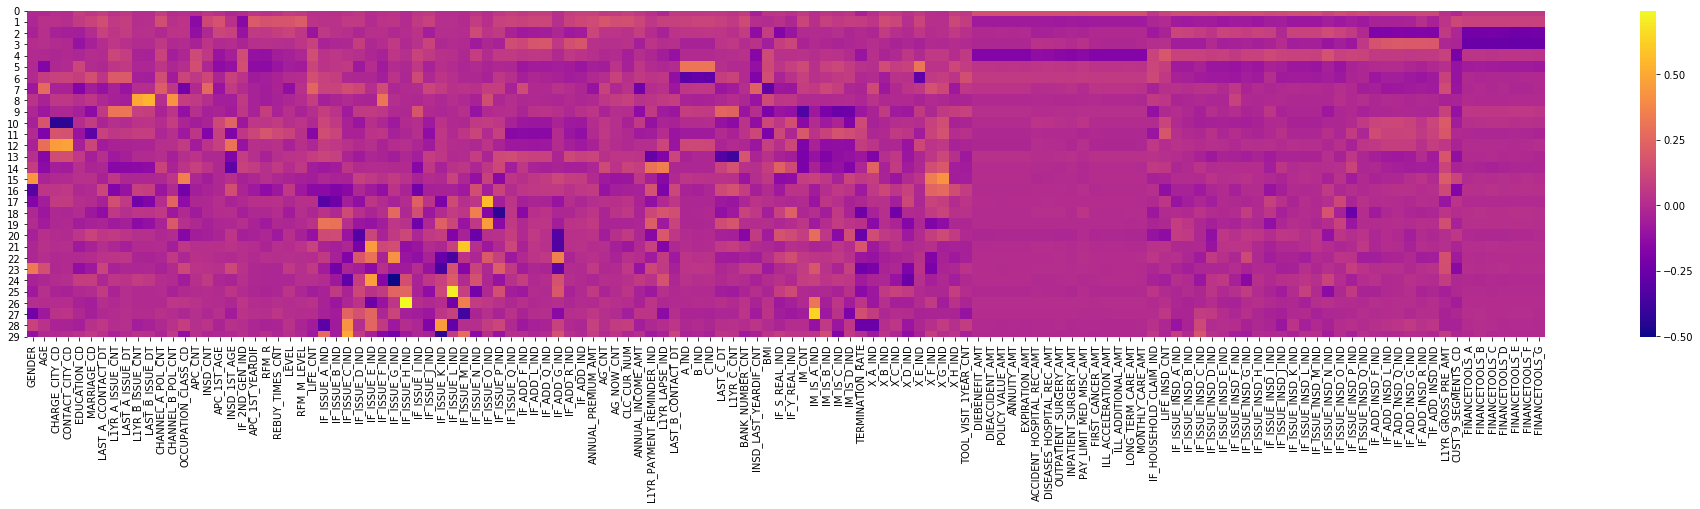

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=train_Y['Y1'])
plt.xlabel(f'1 Principle Component')
plt.ylabel(f'2 Principle Component')
plt.show()

df_comp = pd.DataFrame(pca.components_,columns=train_X.columns)
df_comp
# df_pca = pd.DataFrame({'pca0': x_pca[:,0], 'pca1': x_pca[:,1], 'pca31': x_pca[:,31]})
# finalDf = pd.concat([df_pca, train_Y['Y1']], axis = 1)
# finalDf
plt.figure(figsize=(34,6))
sns.heatmap(df_comp,cmap='plasma')

Text(0.5, 0.92, '0')

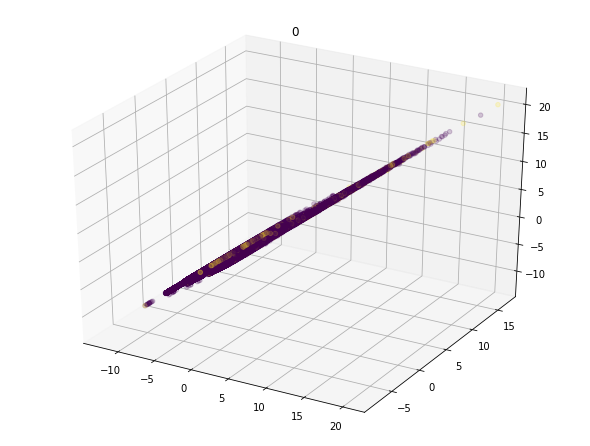

Text(0.5, 0.92, '1')

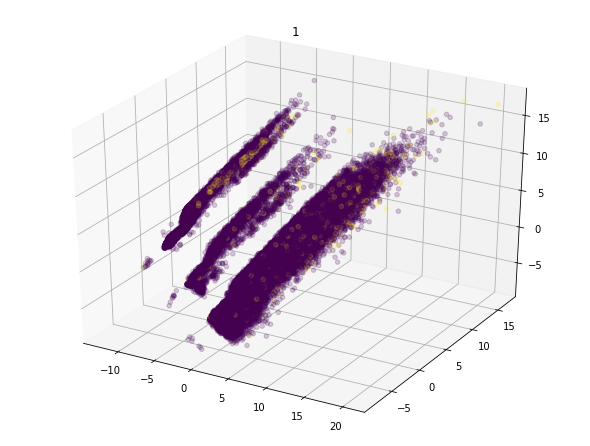

Text(0.5, 0.92, '2')

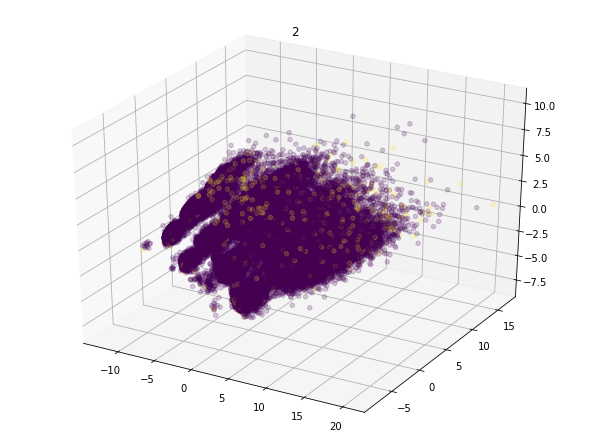

Text(0.5, 0.92, '3')

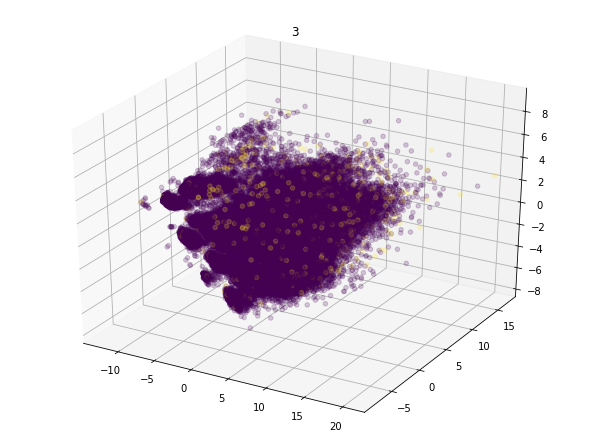

Text(0.5, 0.92, '4')

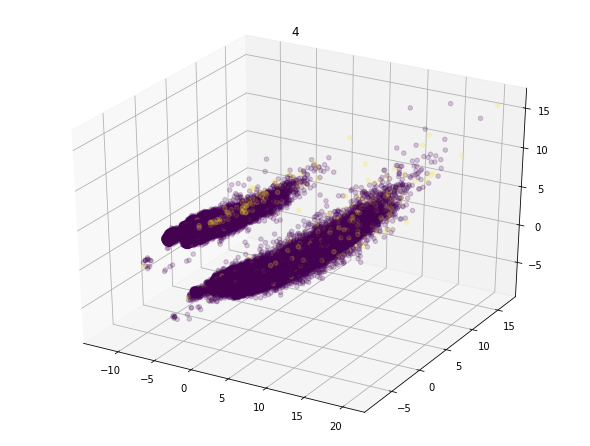

Text(0.5, 0.92, '5')

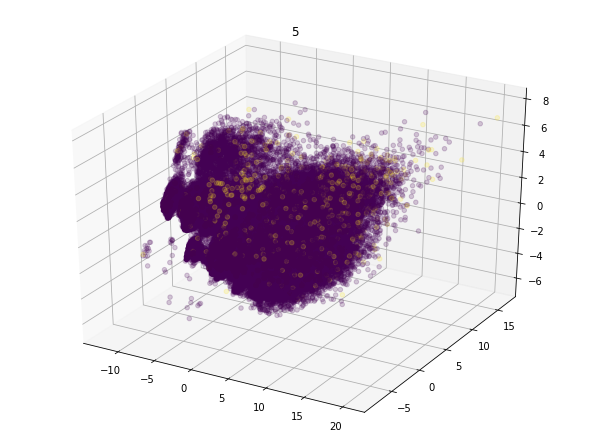

Text(0.5, 0.92, '6')

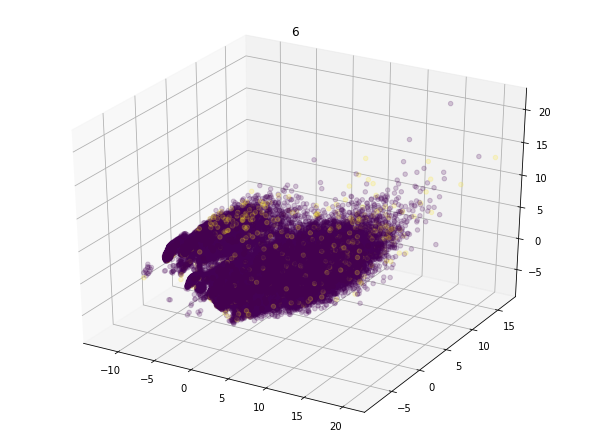

Text(0.5, 0.92, '7')

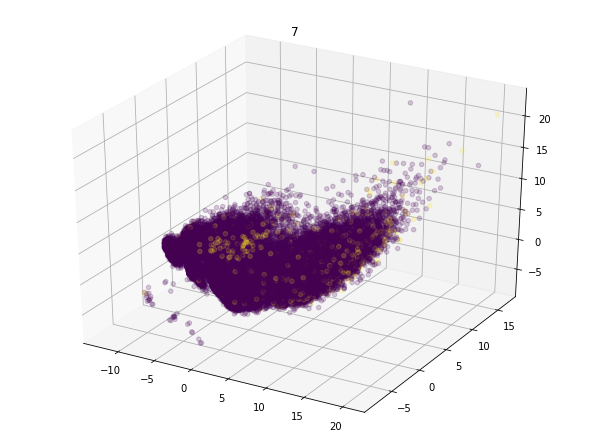

Text(0.5, 0.92, '8')

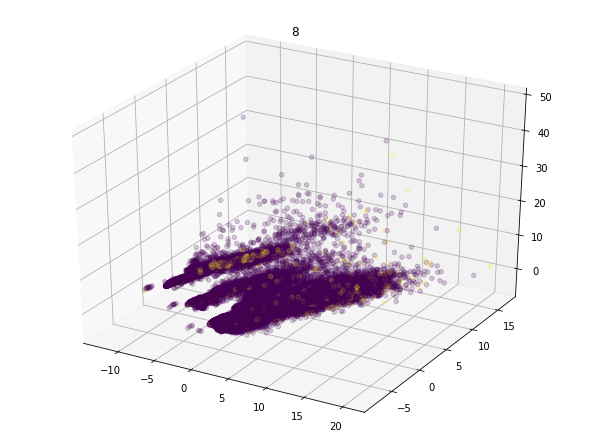

Text(0.5, 0.92, '9')

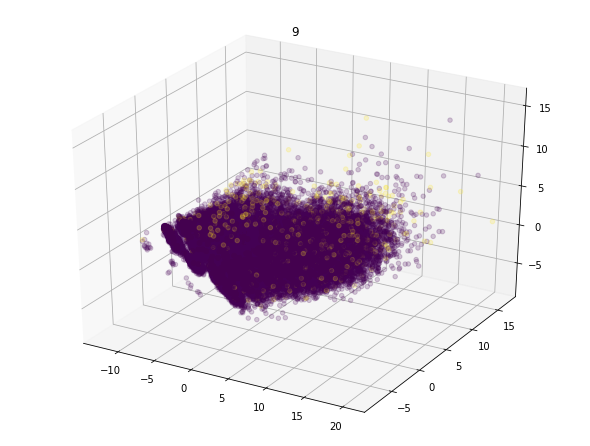

Text(0.5, 0.92, '10')

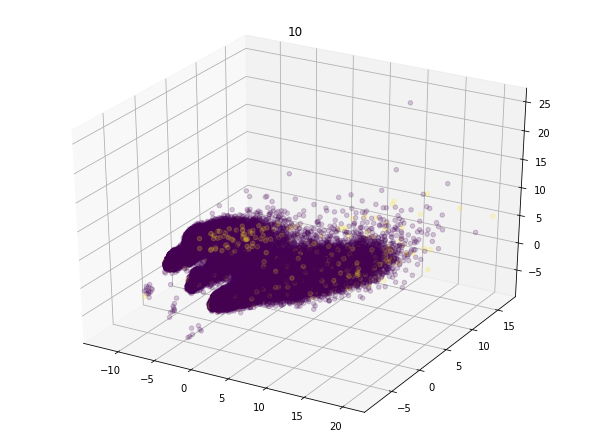

Text(0.5, 0.92, '11')

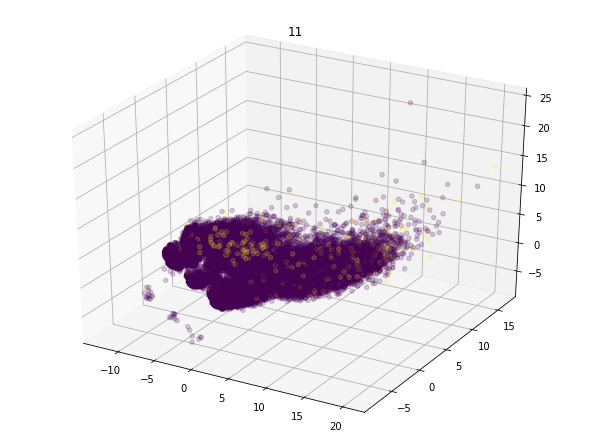

Text(0.5, 0.92, '12')

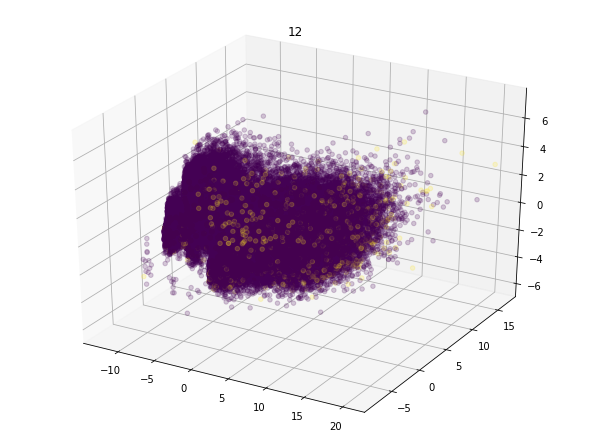

Text(0.5, 0.92, '13')

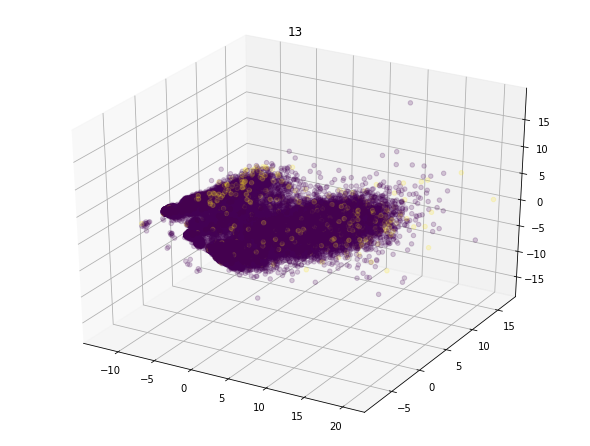

Text(0.5, 0.92, '14')

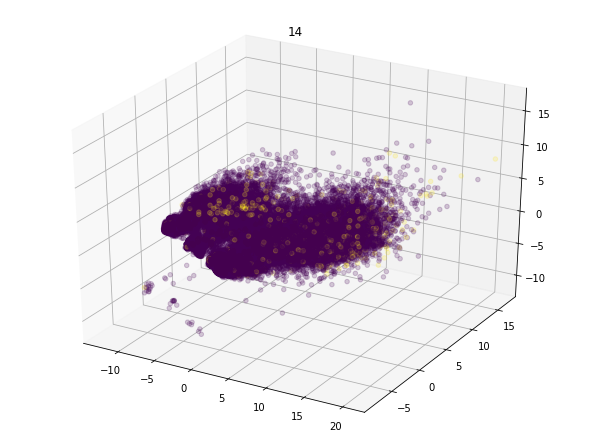

Text(0.5, 0.92, '15')

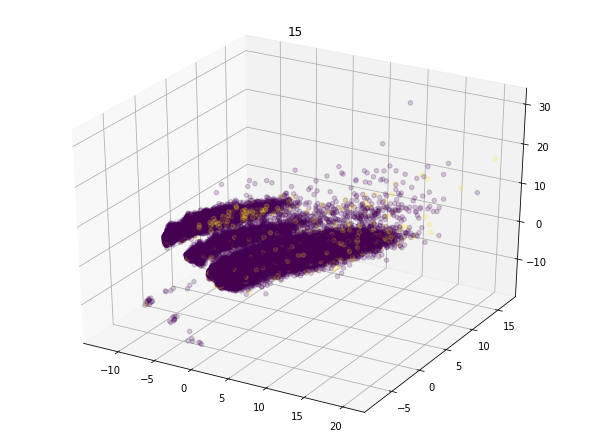

Text(0.5, 0.92, '16')

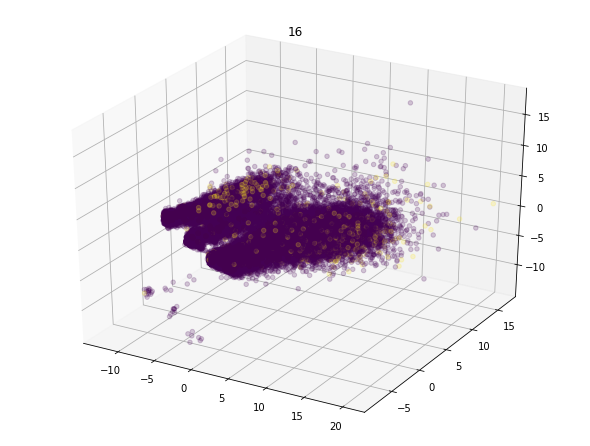

Text(0.5, 0.92, '17')

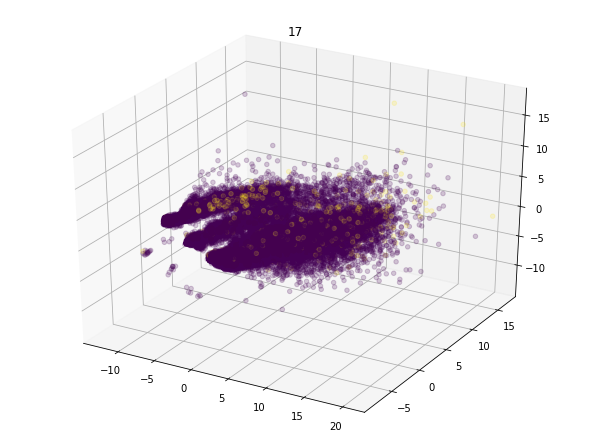

Text(0.5, 0.92, '18')

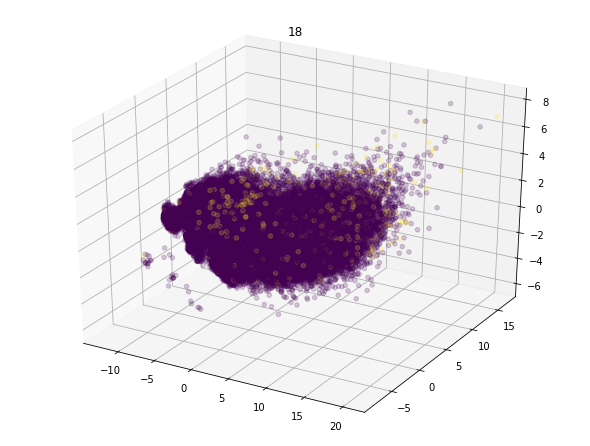

Text(0.5, 0.92, '19')

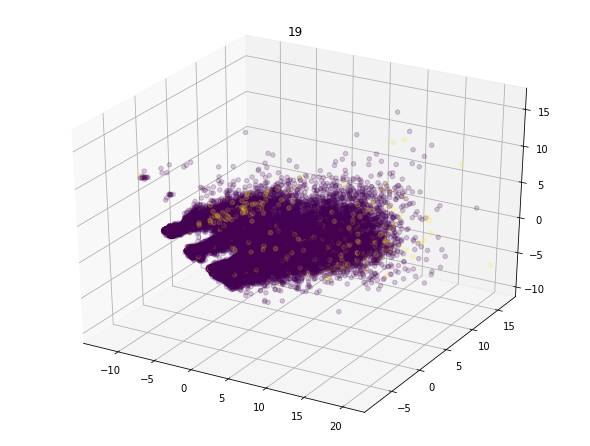

Text(0.5, 0.92, '20')

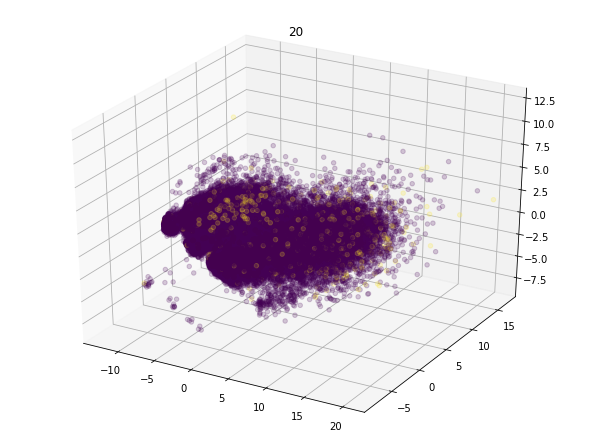

Text(0.5, 0.92, '21')

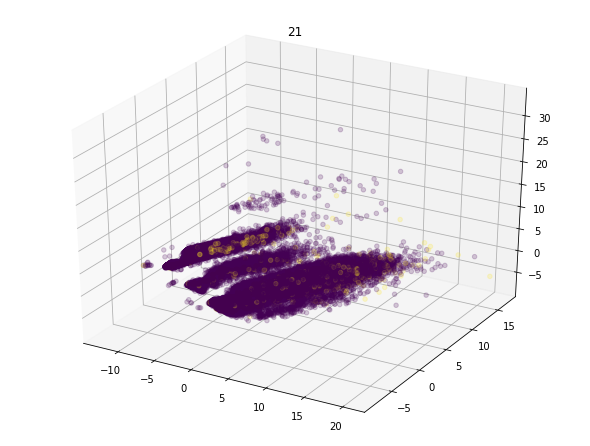

Text(0.5, 0.92, '22')

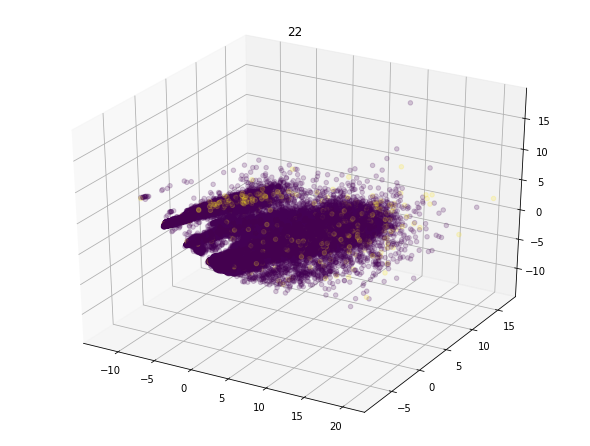

Text(0.5, 0.92, '23')

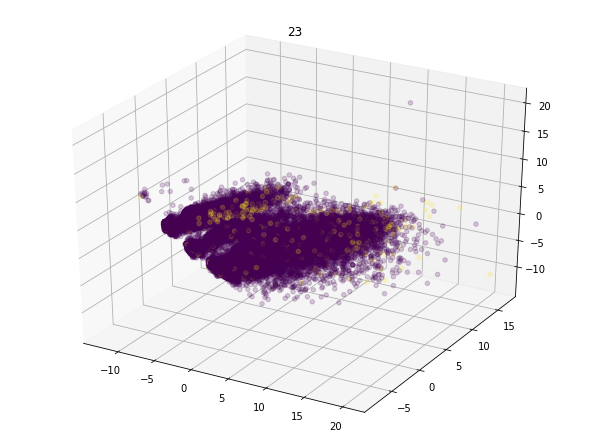

Text(0.5, 0.92, '24')

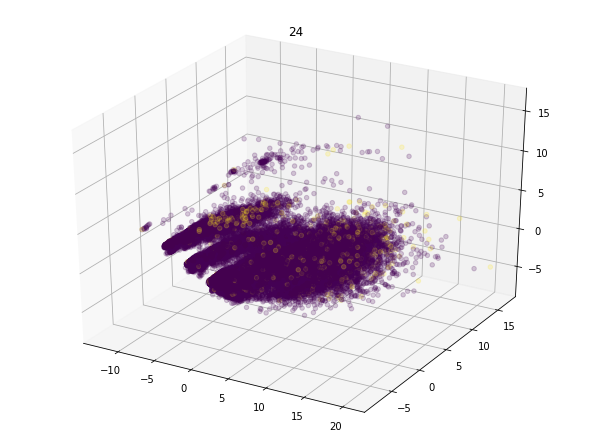

Text(0.5, 0.92, '25')

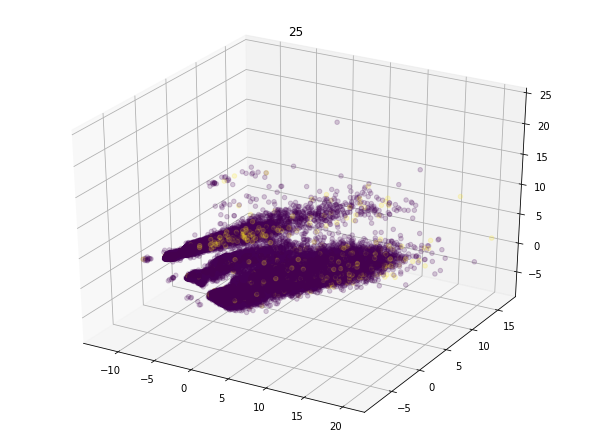

Text(0.5, 0.92, '26')

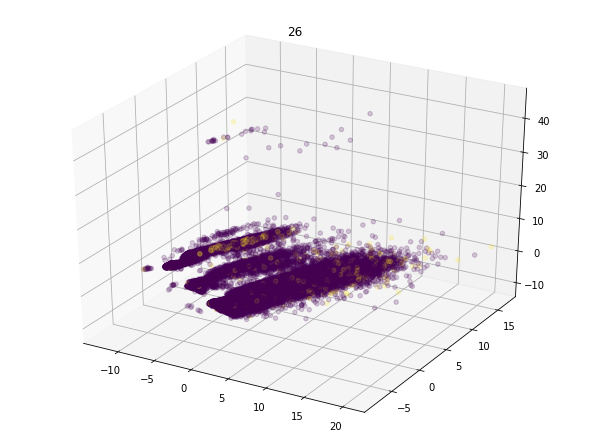

Text(0.5, 0.92, '27')

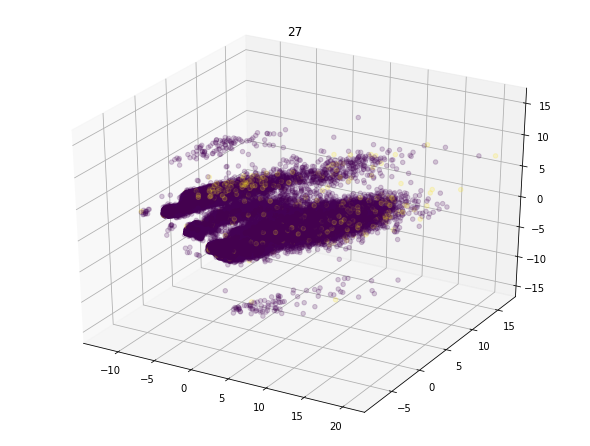

Text(0.5, 0.92, '28')

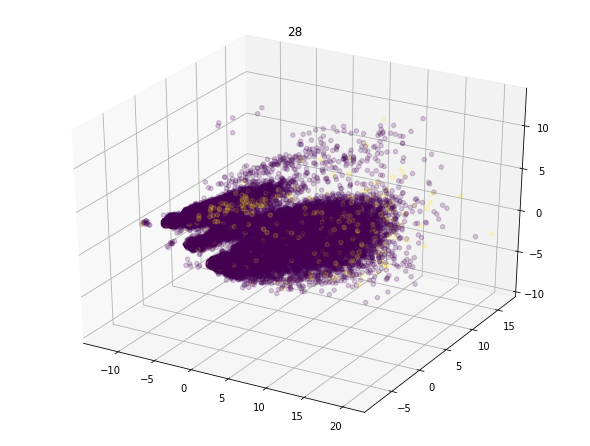

Text(0.5, 0.92, '29')

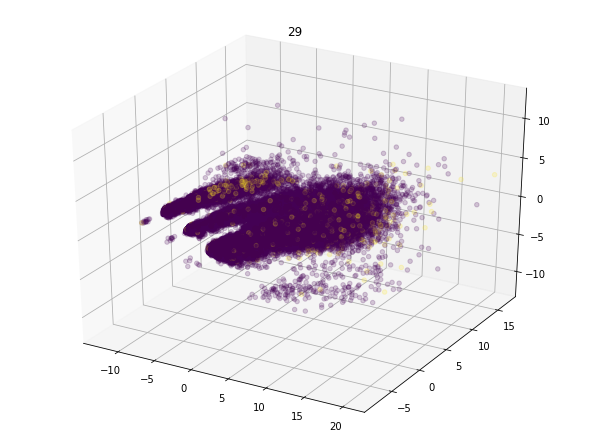

IndexError: index 30 is out of bounds for axis 1 with size 30

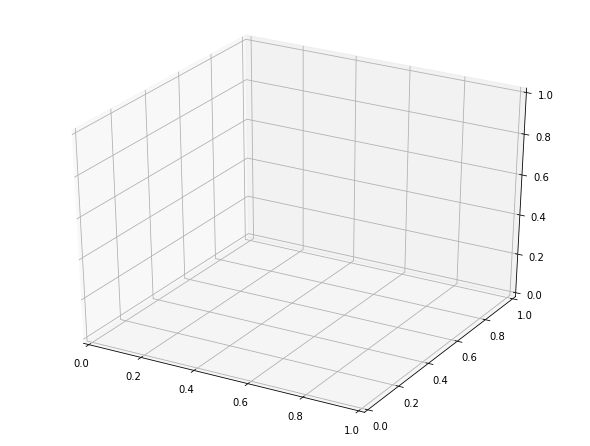

In [8]:
from mpl_toolkits.mplot3d import Axes3D

for i in range(0, 29):
#     for j in range(0, 49):
#         if i != j:
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,i],c=train_Y['Y1'], alpha=0.2)
    ax.set_title(i)
    plt.show()

In [28]:
train_X['x_pca_0'] = x_pca[:,0]
train_X['x_pca_1'] = x_pca[:,1]
train_X['x_pca_2'] = x_pca[:,2]
train_X['x_pca_3'] = x_pca[:,3]
train_X['x_pca_4'] = x_pca[:,4]
train_X['x_pca_5'] = x_pca[:,5]
train_X['x_pca_6'] = x_pca[:,6]
train_X['x_pca_7'] = x_pca[:,7]
train_X['x_pca_8'] = x_pca[:,8]
train_X['x_pca_9'] = x_pca[:,9]
train_X['x_pca_10'] = x_pca[:,10]
train_X['x_pca_11'] = x_pca[:,11]
train_X['x_pca_12'] = x_pca[:,12]
train_X['x_pca_13'] = x_pca[:,13]
train_X['x_pca_14'] = x_pca[:,14]
train_X['x_pca_15'] = x_pca[:,15]
train_X['x_pca_16'] = x_pca[:,16]
train_X['x_pca_17'] = x_pca[:,17]
train_X['x_pca_18'] = x_pca[:,18]
train_X['x_pca_19'] = x_pca[:,19]
train_X['x_pca_20'] = x_pca[:,20]
train_X['x_pca_21'] = x_pca[:,21]
train_X['x_pca_22'] = x_pca[:,22]
train_X['x_pca_23'] = x_pca[:,23]
train_X['x_pca_24'] = x_pca[:,24]
train_X['x_pca_25'] = x_pca[:,25]
train_X['x_pca_26'] = x_pca[:,26]
train_X['x_pca_27'] = x_pca[:,27]
train_X['x_pca_28'] = x_pca[:,28]
train_X['x_pca_29'] = x_pca[:,29]
# train_X['x_pca_30'] = x_pca[:,30]
# train_X['x_pca_31'] = x_pca[:,31]
# train_X['x_pca_32'] = x_pca[:,32]
# train_X['x_pca_33'] = x_pca[:,33]
# train_X['x_pca_34'] = x_pca[:,34]
# train_X['x_pca_35'] = x_pca[:,35]
# train_X['x_pca_36'] = x_pca[:,36]
# train_X['x_pca_37'] = x_pca[:,37]
# train_X['x_pca_38'] = x_pca[:,38]
# train_X['x_pca_39'] = x_pca[:,39]
# train_X['x_pca_40'] = x_pca[:,40]
# train_X['x_pca_41'] = x_pca[:,41]
# train_X['x_pca_42'] = x_pca[:,42]
# train_X['x_pca_43'] = x_pca[:,43]
# train_X['x_pca_44'] = x_pca[:,44]
# train_X['x_pca_45'] = x_pca[:,45]
# train_X['x_pca_46'] = x_pca[:,46]
# train_X['x_pca_47'] = x_pca[:,47]
# train_X['x_pca_48'] = x_pca[:,48]
# train_X['x_pca_49'] = x_pca[:,49]
train_X

# for c in train_X.columns:
#     plt.figure(figsize=(8,6))
#     plt.scatter(train_X['x_pca_31'],train_X[c],c=train_X['Y1'])
#     plt.title(c)
#     plt.show()

CUS_ID  GENDER  AGE  CHARGE_CITY_CD  CONTACT_CITY_CD  EDUCATION_CD  \
0         3418       2    2               0                0          -1.0   
1         4302       2    2               0                0          -1.0   
2         5545       2    2               0                0           1.0   
3         7207       2    2               0                0          -1.0   
4         7213       2    2               0                0           1.0   
...        ...     ...  ...             ...              ...           ...   
99995  2525675       1    3               0                0           3.0   
99996  2534462       1    3               7                7           1.0   
99997  2535679       1    1               5                5           2.0   
99998  2544819       2    3               0                0           3.0   
99999  1994377       2    3               2                2           3.0   

       MARRIAGE_CD  LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT  LAST_A_ISSUE_DT  \
0             -1.0                   1                 0                0   
1             -1.0                   1                 0                0   
2              0.0                   1                 1                1   
3              0.0                   1                 0                0   
4              0.0                   0                 0                0   
...            ...                 ...               ...              ...   
99995          0.0                   0                 0                0   
99996          0.0                   1                 0                0   
99997          1.0                   1                 0                0   
99998          1.0                   1                 0                1   
99999          1.0                   1                 4                1   

       ...  x_pca_40  x_pca_41  x_pca_42  x_pca_43  x_pca_44  x_pca_45  \
0      ...  0.203052 -0.945433 -0.688078  0.258417  0.033241  0.081727   
1      ...  0.407490 -0.210879 -0.729422  0.029577  0.232605 -0.409805   
2      ...  0.159817 -1.675292 -0.901530  0.301511  0.231817 -0.038753   
3      ...  0.037803 -0.237536 -0.662961 -0.120033  0.065183  0.202249   
4      ... -0.827572 -0.886970  0.328535  0.254032  0.417200 -0.230079   
...    ...       ...       ...       ...       ...       ...       ...   
99995  ... -1.014391 -0.916583 -0.010983  1.789332  2.684792 -0.865627   
99996  ...  0.906251  0.194928 -2.266714  0.730451  0.235093 -0.483598   
99997  ...  1.077092 -0.267308 -0.703856  0.772553  0.126227 -0.538307   
99998  ...  0.148438 -1.069663  0.632311  1.406743  1.481825 -1.177614   
99999  ... -1.295650 -0.366418  0.416669  0.821121  0.041854 -0.893843   

       x_pca_46  x_pca_47  x_pca_48  x_pca_49  
0      0.342443 -0.378056 -0.153140  0.228830  
1      0.216198 -0.258279  0.886385 -0.472733  
2      0.567840 -1.828478  0.664657 -2.138769  
3      0.260584  0.040096  0.118890 -0.608023  
4      0.530777  0.299252  0.144613  0.276357  
...         ...       ...       ...       ...  
99995  1.350843 -1.450223  0.608841  0.509355  
99996  2.063513 -3.316257  1.545402 -0.398577  
99997  0.926382 -1.738697  1.199727 -0.979779  
99998  2.779488 -1.725940  0.952251 -1.211033  
99999  0.902088 -3.090492 -0.563953 -0.930093  

[100000 rows x 181 columns]

In [ ]:
# 3D - https://stackoverflow.com/questions/1985856/how-to-make-a-3d-scatter-plot-in-python
from mpl_toolkits.mplot3d import Axes3D

for c in train_X.columns:
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    ax.scatter(train_X['x_pca_0'],train_X['x_pca_1'],train_X[c],c=train_Y['Y1'], alpha=0.4, cmap='set20')
    ax.set_title(c)
    plt.show()

In [33]:
# PCA - test

test_X = test_X.fillna(-1)
LEncoder = LabelEncoder()
for c in test_X.columns:
    if test_X[c].dtype == 'object':
        test_X[c] = LEncoder.fit_transform(list(test_X[c].values))
# t = pd.get_dummies(train_X)
# train_X_d = pd.DataFrame(t)
# train_X_v = train_X_d.values
test_X_v = test_X.values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_X_v)
scaled_data = scaler.transform(test_X_v)

from sklearn.decomposition import PCA
pca = PCA(n_components=50)

pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
test_X_v.shape
x_pca.shape
pca.explained_variance_ratio_

StandardScaler(copy=True, with_mean=True, with_std=True)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

(150000, 131)

(150000, 50)

array([0.24325835, 0.12867448, 0.0470474 , 0.03805471, 0.03029699,
       0.02611253, 0.02125128, 0.01823151, 0.0172559 , 0.015442  ,
       0.01505224, 0.01312829, 0.01289977, 0.01192963, 0.01080733,
       0.00952042, 0.00933032, 0.00891582, 0.00878699, 0.00842055,
       0.00816566, 0.00796403, 0.00791697, 0.007816  , 0.00773969,
       0.00772182, 0.00764536, 0.00747249, 0.00745965, 0.00730257,
       0.00724181, 0.00716324, 0.00701524, 0.00689657, 0.00685218,
       0.00671906, 0.00663338, 0.00653057, 0.0062843 , 0.00610078,
       0.00601166, 0.00595002, 0.00574061, 0.00554444, 0.00544522,
       0.00542544, 0.0051876 , 0.0050092 , 0.00478753, 0.00466027])

CUS_ID    GENDER       AGE  CHARGE_CITY_CD  CONTACT_CITY_CD  \
0   0.009957 -0.007941 -0.009658        0.011222         0.006703   
1   0.036854 -0.025249  0.028777        0.024142         0.009458   
2  -0.035184 -0.044273  0.020758       -0.048038        -0.056519   
3  -0.018441  0.006845  0.024022       -0.008625        -0.017087   
4  -0.029619  0.004910  0.009037       -0.019969        -0.014888   
5  -0.030257 -0.012092 -0.160926       -0.031559        -0.020084   
6   0.077371 -0.014600  0.096790        0.099920         0.108361   
7  -0.047664 -0.081165  0.268664       -0.065343        -0.065928   
8   0.062125  0.031041 -0.046314        0.099747         0.105353   
9  -0.183349 -0.032660 -0.010972       -0.250958        -0.259245   
10  0.320144 -0.014000 -0.095579        0.487238         0.502606   
11  0.171271 -0.087090  0.333574        0.202544         0.228469   
12  0.008870 -0.020218 -0.141846        0.052510         0.041052   
13  0.027548  0.013676 -0.216795        0.052634         0.058778   
14 -0.037461  0.066110 -0.078860       -0.005078        -0.015244   
15 -0.067495  0.567937 -0.010792        0.004044        -0.003141   
16  0.028747 -0.066875  0.026902       -0.002375         0.014568   
17  0.039063 -0.107784 -0.007806        0.015458         0.028737   
18  0.020665 -0.079699 -0.105832        0.000117        -0.001648   
19 -0.035019  0.052042  0.006991       -0.043801        -0.057531   
20  0.014440 -0.003227  0.012601       -0.012102        -0.008355   
21  0.030401  0.051130  0.023065       -0.009322        -0.006612   
22 -0.004343 -0.073709 -0.039495        0.020340         0.013011   
23  0.029134 -0.115386 -0.092903        0.012008         0.024821   
24  0.036241 -0.305728 -0.118055       -0.011187        -0.007587   
25 -0.049573  0.119097  0.046893        0.039984         0.037413   
26 -0.020923 -0.035945 -0.048536        0.023339         0.019888   
27 -0.005932  0.073341  0.041803       -0.008480        -0.010723   
28  0.035399 -0.080869  0.011374       -0.011909        -0.011478   
29 -0.019949  0.066531  0.031772       -0.007627        -0.019719   
30 -0.059791  0.150658  0.035118        0.026834         0.016426   
31  0.086130 -0.148854 -0.110307       -0.092592        -0.068154   
32  0.026617  0.079817  0.035144        0.040692         0.047295   
33  0.016629 -0.155381 -0.065646       -0.017930        -0.012269   
34  0.028210 -0.148824 -0.009468       -0.015615        -0.008537   
35  0.056154 -0.112428 -0.030301       -0.030137        -0.014509   
36 -0.052261  0.064795  0.031749        0.028988         0.011522   
37 -0.000283  0.086254  0.026587        0.016230         0.023836   
38  0.067970  0.146860  0.060330       -0.050086        -0.043386   
39  0.294630 -0.050448 -0.147613       -0.089586        -0.049297   
40  0.206334 -0.226399 -0.100884       -0.112353        -0.077228   
41  0.388664 -0.052059 -0.003289       -0.176127        -0.096498   
42 -0.418843  0.037308 -0.092394        0.205747         0.115895   
43  0.108770  0.121516 -0.081943       -0.030758        -0.026381   
44 -0.000425 -0.181353 -0.007071       -0.027461        -0.039928   
45 -0.360154 -0.160768 -0.017376        0.144655         0.076042   
46  0.276171  0.272246  0.072567       -0.099861        -0.036673   
47 -0.245225 -0.083548 -0.143382        0.106222         0.063070   
48 -0.073337 -0.090625 -0.098883        0.033387         0.022298   
49  0.062832  0.188022 -0.230529       -0.023329         0.025070   

    EDUCATION_CD  MARRIAGE_CD  LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT  \
0       0.083202     0.050966            0.082978          0.037920   
1       0.065030     0.102849            0.144902          0.056435   
2      -0.054341     0.003547            0.099503          0.045047   
3      -0.109730    -0.048572            0.007628          0.051604   
4      -0.022592     0.001600           -0.000449          0.097725   
5       0.103627     0.002634           -0.019143          0

<Figure size 2448x432 with 0 Axes>

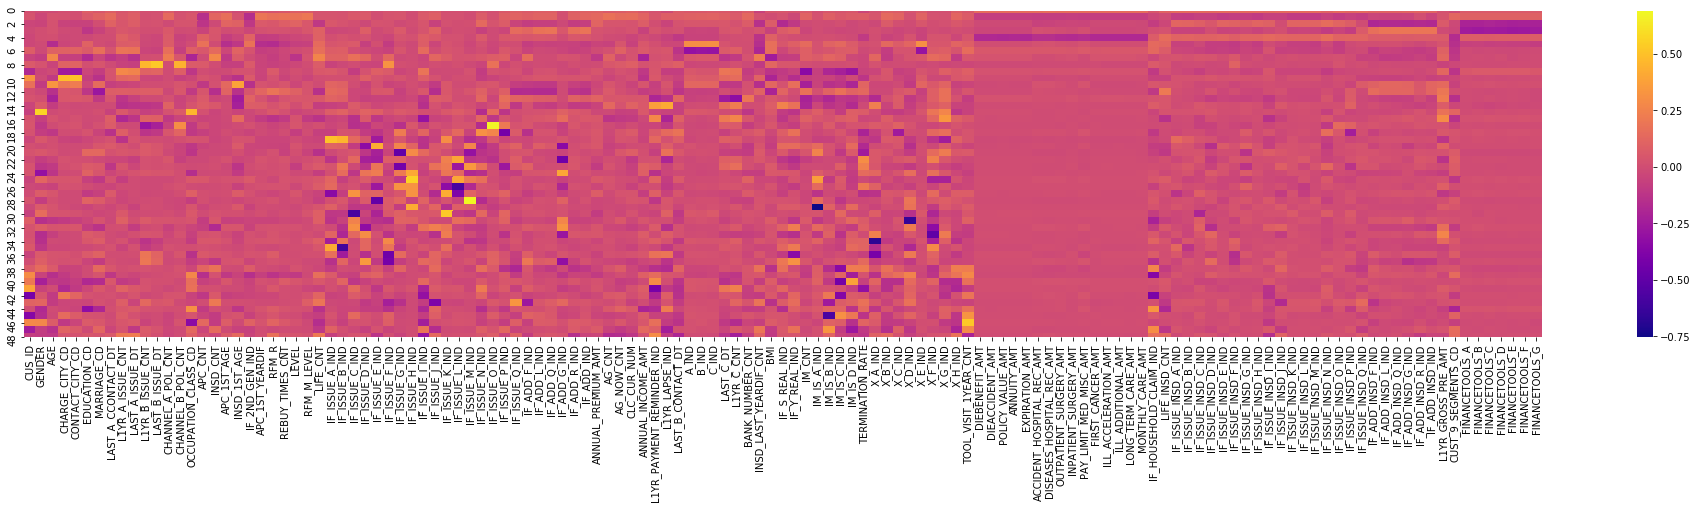

In [34]:
# plt.figure(figsize=(8,6))
# plt.scatter(x_pca[:,0],x_pca[:,1],c=train_Y['Y1'])
# plt.xlabel(f'1 Principle Component')
# plt.ylabel(f'2 Principle Component')
# plt.show()

df_comp = pd.DataFrame(pca.components_,columns=test_X.columns)
df_comp
# df_pca = pd.DataFrame({'pca0': x_pca[:,0], 'pca1': x_pca[:,1], 'pca31': x_pca[:,31]})
# finalDf = pd.concat([df_pca, train_Y['Y1']], axis = 1)
# finalDf
plt.figure(figsize=(34,6))
sns.heatmap(df_comp,cmap='plasma')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

for i in range(0, 49):
#     for j in range(0, 49):
#         if i != j:
    fig = plt.figure(figsize=(8,6))
    ax = Axes3D(fig)
    ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,i], alpha=0.2)
    ax.set_title(i)
    plt.show()

In [36]:
test_X['x_pca_0'] = x_pca[:,0]
test_X['x_pca_1'] = x_pca[:,1]
test_X['x_pca_2'] = x_pca[:,2]
test_X['x_pca_3'] = x_pca[:,3]
test_X['x_pca_4'] = x_pca[:,4]
test_X['x_pca_5'] = x_pca[:,5]
test_X['x_pca_6'] = x_pca[:,6]
test_X['x_pca_7'] = x_pca[:,7]
test_X['x_pca_8'] = x_pca[:,8]
test_X['x_pca_9'] = x_pca[:,9]
test_X['x_pca_10'] = x_pca[:,10]
test_X['x_pca_11'] = x_pca[:,11]
test_X['x_pca_12'] = x_pca[:,12]
test_X['x_pca_13'] = x_pca[:,13]
test_X['x_pca_14'] = x_pca[:,14]
test_X['x_pca_15'] = x_pca[:,15]
test_X['x_pca_16'] = x_pca[:,16]
test_X['x_pca_17'] = x_pca[:,17]
test_X['x_pca_18'] = x_pca[:,18]
test_X['x_pca_19'] = x_pca[:,19]
test_X['x_pca_20'] = x_pca[:,20]
test_X['x_pca_21'] = x_pca[:,21]
test_X['x_pca_22'] = x_pca[:,22]
test_X['x_pca_23'] = x_pca[:,23]
test_X['x_pca_24'] = x_pca[:,24]
test_X['x_pca_25'] = x_pca[:,25]
test_X['x_pca_26'] = x_pca[:,26]
test_X['x_pca_27'] = x_pca[:,27]
test_X['x_pca_28'] = x_pca[:,28]
test_X['x_pca_29'] = x_pca[:,29]
test_X['x_pca_30'] = x_pca[:,30]
test_X['x_pca_31'] = x_pca[:,31]
test_X['x_pca_32'] = x_pca[:,32]
test_X['x_pca_33'] = x_pca[:,33]
test_X['x_pca_34'] = x_pca[:,34]
test_X['x_pca_35'] = x_pca[:,35]
test_X['x_pca_36'] = x_pca[:,36]
test_X['x_pca_37'] = x_pca[:,37]
test_X['x_pca_38'] = x_pca[:,38]
test_X['x_pca_39'] = x_pca[:,39]
test_X['x_pca_40'] = x_pca[:,40]
test_X['x_pca_41'] = x_pca[:,41]
test_X['x_pca_42'] = x_pca[:,42]
test_X['x_pca_43'] = x_pca[:,43]
test_X['x_pca_44'] = x_pca[:,44]
test_X['x_pca_45'] = x_pca[:,45]
test_X['x_pca_46'] = x_pca[:,46]
test_X['x_pca_47'] = x_pca[:,47]
test_X['x_pca_48'] = x_pca[:,48]
test_X['x_pca_49'] = x_pca[:,49]
test_X

# for c in test_X.columns:
#     plt.figure(figsize=(8,6))
#     plt.scatter(train_X['x_pca_31'],train_X[c],c=train_X['Y1'])
#     plt.title(c)
#     plt.show()

CUS_ID  GENDER  AGE  CHARGE_CITY_CD  CONTACT_CITY_CD  EDUCATION_CD  \
0          1193       2    2               0                0           2.0   
1          1727       2    2               0                0          -1.0   
2          3293       2    2               0                0           1.0   
3          4328       2    2               0                0          -1.0   
4          5555       2    2               0                0           1.0   
...         ...     ...  ...             ...              ...           ...   
149995  2074085       1    1               0                0           3.0   
149996  2095927       1    3               2                2           3.0   
149997  2125973       2    3               4                4           3.0   
149998  2511714       1    3               6                6           3.0   
149999  2558094       1    3               6                0           1.0   

        MARRIAGE_CD  LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT  LAST_A_ISSUE_DT  \
0               0.0                   1                 4                1   
1               0.0                   0                 0                0   
2               0.0                   0                 0                0   
3               0.0                   0                 0                0   
4               0.0                   1                 0                1   
...             ...                 ...               ...              ...   
149995          0.0                   1                 0                0   
149996          1.0                   1                 1                1   
149997          1.0                   1                 0                0   
149998          1.0                   1                 0                0   
149999          1.0                   0                 0                0   

        ...  x_pca_40  x_pca_41  x_pca_42  x_pca_43  x_pca_44  x_pca_45  \
0       ... -0.098301 -1.424948 -0.555198  1.462665 -0.321850 -0.190433   
1       ...  0.054038 -0.062129 -0.066228  0.265838 -0.782054  0.475755   
2       ...  0.191924  0.345780  1.093709 -0.472850 -0.007646 -0.329879   
3       ... -0.019606 -0.028355  0.049158  0.214044 -1.021329  0.464428   
4       ... -0.053494  0.155525  0.946565 -0.320001 -0.288219  0.139309   
...     ...       ...       ...       ...       ...       ...       ...   
149995  ... -0.740004  0.805606 -0.540697 -0.155440 -0.443346 -0.542872   
149996  ... -0.220743 -0.363858 -0.155645 -2.259183 -0.505733 -0.018298   
149997  ...  1.050810 -1.446880 -0.918846 -1.016188 -0.536637 -0.600781   
149998  ... -0.189119 -0.688718  1.051095 -3.340052 -1.794406 -1.458321   
149999  ... -1.369562  0.783068  0.178761 -1.385835 -1.677565  0.335520   

        x_pca_46  x_pca_47  x_pca_48  x_pca_49  
0       0.019163 -0.223327 -0.745569 -0.904625  
1       0.258596  0.500619 -0.666515  0.010824  
2       0.120965 -0.304732  1.143666 -0.329766  
3       0.296321  0.454036 -0.412489 -0.351052  
4       0.797949 -0.671159  0.165303 -1.430349  
...          ...       ...       ...       ...  
149995  0.837028 -1.453023  2.141301  0.214657  
149996  1.610143 -0.955296  1.947913 -0.549745  
149997  0.895600 -1.394054  1.061019 -0.162085  
149998  1.203775 -1.099442  0.085149 -1.464588  
149999 -0.397176 -0.565239  0.777262 -0.838384  

[150000 rows x 181 columns]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

test_X = test_X.fillna(-1)
LEncoder = LabelEncoder()
for c in test_X.columns:
    if test_X[c].dtype == 'object':
        test_X[c] = LEncoder.fit_transform(list(test_X[c].values))
# t = pd.get_dummies(train_X)
# train_X_d = pd.DataFrame(t)
# train_X_v = train_X_d.values
test_X_v = test_X.values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(test_X_v)
scaled_data = scaler.transform(test_X_v)

# initiate PCA and classifier
pca = PCA(n_components=50)
classifier = DecisionTreeClassifier()

# transform / fit

X_transformed = pca.fit_transform(scaled_data)
classifier.fit(X_transformed, train_X['Y1'])


# transform new data using already fitted pca
# (don't re-fit the pca)
test_transformed = pca.transform(test_X)

# predict labels using the trained classifier
pred_labels = classifier.predict(test_transformed)

In [11]:
# ll = []
# for i in df_comp.columns:
#     for v in df_comp[i].values:
#         if (v>0.16):
#             if i not in ll:
#                 ll.append(i)
            
# ll
# # df_comp[['CHANNEL_A_POL_CNT','LEVEL','ANNUAL_PREMIUM_AMT','TERMINATION_RATE','DIEBENEFIT_AMT']]
# # df_comp[['CHANNEL_A_POL_CNT','LEVEL','RFM_M_LEVEL','TERMINATION_RATE','TOOL_VISIT_1YEAR_CNT']]

In [29]:
spec_train_X = train_X[['x_pca_0', 'x_pca_1', 'x_pca_2', 'x_pca_3', 'x_pca_4', 'x_pca_5', 'x_pca_6', 'x_pca_7', 'x_pca_8', 'x_pca_9', 'x_pca_10', 'x_pca_11', 'x_pca_12', 'x_pca_13', 'x_pca_14', 'x_pca_15', 'x_pca_16', 'x_pca_17', 'x_pca_18', 'x_pca_19', 'x_pca_20', 'x_pca_21', 'x_pca_22', 'x_pca_23', 'x_pca_24', 'x_pca_25', 'x_pca_26', 'x_pca_27', 'x_pca_28', 'x_pca_29', 'x_pca_30', 'x_pca_31', 'x_pca_32', 'x_pca_33', 'x_pca_34', 'x_pca_35', 'x_pca_36', 'x_pca_37', 'x_pca_38', 'x_pca_39', 'x_pca_40', 'x_pca_41', 'x_pca_42', 'x_pca_43', 'x_pca_44', 'x_pca_45', 'x_pca_46', 'x_pca_47', 'x_pca_48', 'x_pca_49']]
spec_train_Y = train_Y[['Y1']]
# spec_test_X = test_X[['x_pca_0', 'x_pca_1', 'x_pca_2', 'x_pca_3', 'x_pca_4', 'x_pca_5', 'x_pca_6', 'x_pca_7', 'x_pca_8', 'x_pca_9', 'x_pca_10', 'x_pca_11', 'x_pca_12', 'x_pca_13', 'x_pca_14', 'x_pca_15', 'x_pca_16', 'x_pca_17', 'x_pca_18', 'x_pca_19', 'x_pca_20', 'x_pca_21', 'x_pca_22', 'x_pca_23', 'x_pca_24', 'x_pca_25', 'x_pca_26', 'x_pca_27', 'x_pca_28', 'x_pca_29', 'x_pca_30', 'x_pca_31', 'x_pca_32', 'x_pca_33', 'x_pca_34', 'x_pca_35', 'x_pca_36', 'x_pca_37', 'x_pca_38', 'x_pca_39', 'x_pca_40', 'x_pca_41', 'x_pca_42', 'x_pca_43', 'x_pca_44', 'x_pca_45', 'x_pca_46', 'x_pca_47', 'x_pca_48', 'x_pca_49']]

In [ ]:
train_X['issue_mix'] = train_X['IF_ISSUE_A_IND']+train_X['IF_ISSUE_B_IND']+train_X['IF_ISSUE_C_IND']+train_X['IF_ISSUE_D_IND']
+train_X['IF_ISSUE_E_IND']+train_X['IF_ISSUE_F_IND']+train_X['IF_ISSUE_G_IND']+train_X['IF_ISSUE_H_IND']+train_X['IF_ISSUE_I_IND']
+train_X['IF_ISSUE_J_IND']+train_X['IF_ISSUE_K_IND']+train_X['IF_ISSUE_L_IND']+train_X['IF_ISSUE_M_IND']+train_X['IF_ISSUE_N_IND']
+train_X['IF_ISSUE_O_IND']+train_X['IF_ISSUE_P_IND']+train_X['IF_ISSUE_Q_IND']

order = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q']
dict_order = {}
for i,j in enumerate(order):
    dict_order[i] = order[i]

def convert(x):
    t = ''
    for char in range(0,len(x)):
        if char == 'Y':
            t = t + str(dict_order[char])
    return t
        

convert('NYNYNYNYYNYFFFFYN')

In [5]:
# exclude outliers (train only)
# Num_values_train = {'INSD_CNT': 15.0, 'ANNUAL_PREMIUM_AMT': 0.30, 'ANNUAL_INCOME_AMT': 0.20, 'TOOL_VISIT_1YEAR_CNT': 125.0, 'DIEBENEFIT_AMT': 0.30, 'DIEACCIDENT_AMT': 0.3, 'POLICY_VALUE_AMT': 0.35, 'EXPIRATION_AMT': 0.25, 'ILL_ACCELERATION_AMT': 0.40, 'L1YR_GROSS_PRE_AMT': 0.25, 'L1YR_A_ISSUE_CNT': 20}

# for c in train_X.columns:
#     if c in list(Num_values_train.keys()):
#         train_X = train_X[train_X[c] < Num_values_train[c]]
        
# train_Y = train_X[['Y1']]
# print(train_Y.shape)
# train_X = train_X.drop(['CUS_ID','Y1'], axis=1)
# print(train_X.shape)
     
# new features

cd_A = [
    (train_X['IF_ISSUE_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_A_IND'] == 'N'),
    (train_X['IF_ISSUE_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_A_IND'] == 'Y'),
    (train_X['IF_ISSUE_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_A_IND'] == 'N'),
    (train_X['IF_ISSUE_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_A_IND'] == 'Y')
]
cd_B = [
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_INSD_B_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_INSD_B_IND'] == 'Y'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_B_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_B_IND'] == 'Y')
]
cd_C = [
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_INSD_C_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_INSD_C_IND'] == 'Y'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_C_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_C_IND'] == 'Y')
]
cd_D = [
    (train_X['IF_ISSUE_D_IND'] == 'N') & (train_X['IF_ISSUE_INSD_D_IND'] == 'N'),
    (train_X['IF_ISSUE_D_IND'] == 'N') & (train_X['IF_ISSUE_INSD_D_IND'] == 'Y'),
    (train_X['IF_ISSUE_D_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_D_IND'] == 'N'),
    (train_X['IF_ISSUE_D_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_D_IND'] == 'Y')
]
cd_E = [
    (train_X['IF_ISSUE_E_IND'] == 'N') & (train_X['IF_ISSUE_INSD_E_IND'] == 'N'),
    (train_X['IF_ISSUE_E_IND'] == 'N') & (train_X['IF_ISSUE_INSD_E_IND'] == 'Y'),
    (train_X['IF_ISSUE_E_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_E_IND'] == 'N'),
    (train_X['IF_ISSUE_E_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_E_IND'] == 'Y')
]
cd_F = [
    (train_X['IF_ISSUE_F_IND'] == 'N') & (train_X['IF_ISSUE_INSD_F_IND'] == 'N'),
    (train_X['IF_ISSUE_F_IND'] == 'N') & (train_X['IF_ISSUE_INSD_F_IND'] == 'Y'),
    (train_X['IF_ISSUE_F_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_F_IND'] == 'N'),
    (train_X['IF_ISSUE_F_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_F_IND'] == 'Y')
]
cd_G = [
    (train_X['IF_ISSUE_G_IND'] == 'N') & (train_X['IF_ISSUE_INSD_G_IND'] == 'N'),
    (train_X['IF_ISSUE_G_IND'] == 'N') & (train_X['IF_ISSUE_INSD_G_IND'] == 'Y'),
    (train_X['IF_ISSUE_G_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_G_IND'] == 'N'),
    (train_X['IF_ISSUE_G_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_G_IND'] == 'Y')
]
cd_H = [
    (train_X['IF_ISSUE_H_IND'] == 'N') & (train_X['IF_ISSUE_INSD_H_IND'] == 'N'),
    (train_X['IF_ISSUE_H_IND'] == 'N') & (train_X['IF_ISSUE_INSD_H_IND'] == 'Y'),
    (train_X['IF_ISSUE_H_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_H_IND'] == 'N'),
    (train_X['IF_ISSUE_H_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_H_IND'] == 'Y')
]
cd_I = [
    (train_X['IF_ISSUE_I_IND'] == 'N') & (train_X['IF_ISSUE_INSD_I_IND'] == 'N'),
    (train_X['IF_ISSUE_I_IND'] == 'N') & (train_X['IF_ISSUE_INSD_I_IND'] == 'Y'),
    (train_X['IF_ISSUE_I_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_I_IND'] == 'N'),
    (train_X['IF_ISSUE_I_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_I_IND'] == 'Y')
]
cd_J = [
    (train_X['IF_ISSUE_J_IND'] == 'N') & (train_X['IF_ISSUE_INSD_J_IND'] == 'N'),
    (train_X['IF_ISSUE_J_IND'] == 'N') & (train_X['IF_ISSUE_INSD_J_IND'] == 'Y'),
    (train_X['IF_ISSUE_J_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_J_IND'] == 'N'),
    (train_X['IF_ISSUE_J_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_J_IND'] == 'Y')
]
cd_K = [
    (train_X['IF_ISSUE_K_IND'] == 'N') & (train_X['IF_ISSUE_INSD_K_IND'] == 'N'),
    (train_X['IF_ISSUE_K_IND'] == 'N') & (train_X['IF_ISSUE_INSD_K_IND'] == 'Y'),
    (train_X['IF_ISSUE_K_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_K_IND'] == 'N'),
    (train_X['IF_ISSUE_K_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_K_IND'] == 'Y')
]
cd_L = [
    (train_X['IF_ISSUE_L_IND'] == 'N') & (train_X['IF_ISSUE_INSD_L_IND'] == 'N'),
    (train_X['IF_ISSUE_L_IND'] == 'N') & (train_X['IF_ISSUE_INSD_L_IND'] == 'Y'),
    (train_X['IF_ISSUE_L_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_L_IND'] == 'N'),
    (train_X['IF_ISSUE_L_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_L_IND'] == 'Y')
]
cd_M = [
    (train_X['IF_ISSUE_M_IND'] == 'N') & (train_X['IF_ISSUE_INSD_M_IND'] == 'N'),
    (train_X['IF_ISSUE_M_IND'] == 'N') & (train_X['IF_ISSUE_INSD_M_IND'] == 'Y'),
    (train_X['IF_ISSUE_M_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_M_IND'] == 'N'),
    (train_X['IF_ISSUE_M_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_M_IND'] == 'Y')
]
cd_N = [
    (train_X['IF_ISSUE_N_IND'] == 'N') & (train_X['IF_ISSUE_INSD_N_IND'] == 'N'),
    (train_X['IF_ISSUE_N_IND'] == 'N') & (train_X['IF_ISSUE_INSD_N_IND'] == 'Y'),
    (train_X['IF_ISSUE_N_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_N_IND'] == 'N'),
    (train_X['IF_ISSUE_N_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_N_IND'] == 'Y')
]
cd_O = [
    (train_X['IF_ISSUE_O_IND'] == 'N') & (train_X['IF_ISSUE_INSD_O_IND'] == 'N'),
    (train_X['IF_ISSUE_O_IND'] == 'N') & (train_X['IF_ISSUE_INSD_O_IND'] == 'Y'),
    (train_X['IF_ISSUE_O_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_O_IND'] == 'N'),
    (train_X['IF_ISSUE_O_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_O_IND'] == 'Y')
]
cd_P = [
    (train_X['IF_ISSUE_P_IND'] == 'N') & (train_X['IF_ISSUE_INSD_P_IND'] == 'N'),
    (train_X['IF_ISSUE_P_IND'] == 'N') & (train_X['IF_ISSUE_INSD_P_IND'] == 'Y'),
    (train_X['IF_ISSUE_P_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_P_IND'] == 'N'),
    (train_X['IF_ISSUE_P_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_P_IND'] == 'Y')
]
cd_Q = [
    (train_X['IF_ISSUE_Q_IND'] == 'N') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'N'),
    (train_X['IF_ISSUE_Q_IND'] == 'N') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'Y'),
    (train_X['IF_ISSUE_Q_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'N'),
    (train_X['IF_ISSUE_Q_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'Y')
]
cd_AB_11_train = [
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_B_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_B_IND'] == 'Y'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_B_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_B_IND'] == 'Y')
]
cd_AB_11_test = [
    (test_X['IF_ISSUE_INSD_A_IND'] == 'N') & (test_X['IF_ISSUE_INSD_B_IND'] == 'N'),
    (test_X['IF_ISSUE_INSD_A_IND'] == 'N') & (test_X['IF_ISSUE_INSD_B_IND'] == 'Y'),
    (test_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (test_X['IF_ISSUE_INSD_B_IND'] == 'N'),
    (test_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (test_X['IF_ISSUE_INSD_B_IND'] == 'Y')
]
cd_AB_00_train = [
    (train_X['IF_ISSUE_A_IND'] == 'N') & (train_X['IF_ISSUE_B_IND'] == 'N'),
    (train_X['IF_ISSUE_A_IND'] == 'N') & (train_X['IF_ISSUE_B_IND'] == 'Y'),
    (train_X['IF_ISSUE_A_IND'] == 'Y') & (train_X['IF_ISSUE_B_IND'] == 'N'),
    (train_X['IF_ISSUE_A_IND'] == 'Y') & (train_X['IF_ISSUE_B_IND'] == 'Y')
]
cd_AB_00_test = [
    (test_X['IF_ISSUE_A_IND'] == 'N') & (test_X['IF_ISSUE_B_IND'] == 'N'),
    (test_X['IF_ISSUE_A_IND'] == 'N') & (test_X['IF_ISSUE_B_IND'] == 'Y'),
    (test_X['IF_ISSUE_A_IND'] == 'Y') & (test_X['IF_ISSUE_B_IND'] == 'N'),
    (test_X['IF_ISSUE_A_IND'] == 'Y') & (test_X['IF_ISSUE_B_IND'] == 'Y')
]
cd_BC_00_train = [
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_C_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_C_IND'] == 'Y'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_C_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_C_IND'] == 'Y')
]
cd_BC_00_test = [
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_C_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_C_IND'] == 'Y'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_C_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_C_IND'] == 'Y')
]
cd_BE_00_train = [
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_E_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_E_IND'] == 'Y'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_E_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_E_IND'] == 'Y')
]
cd_BE_00_test = [
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_E_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_E_IND'] == 'Y'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_E_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_E_IND'] == 'Y')
]
cd_CE_00_train = [
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_E_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_E_IND'] == 'Y'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_E_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_E_IND'] == 'Y')
]
cd_CE_00_test = [
    (test_X['IF_ISSUE_C_IND'] == 'N') & (test_X['IF_ISSUE_E_IND'] == 'N'),
    (test_X['IF_ISSUE_C_IND'] == 'N') & (test_X['IF_ISSUE_E_IND'] == 'Y'),
    (test_X['IF_ISSUE_C_IND'] == 'Y') & (test_X['IF_ISSUE_E_IND'] == 'N'),
    (test_X['IF_ISSUE_C_IND'] == 'Y') & (test_X['IF_ISSUE_E_IND'] == 'Y')
]
cd_BH_00_train = [
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_H_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_H_IND'] == 'Y'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_H_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_H_IND'] == 'Y')
]
cd_BH_00_test = [
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_H_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_H_IND'] == 'Y'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_H_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_H_IND'] == 'Y')
]
cd_CH_00_train = [
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_H_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_H_IND'] == 'Y'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_H_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_H_IND'] == 'Y')
]
cd_CH_00_test = [
    (test_X['IF_ISSUE_C_IND'] == 'N') & (test_X['IF_ISSUE_H_IND'] == 'N'),
    (test_X['IF_ISSUE_C_IND'] == 'N') & (test_X['IF_ISSUE_H_IND'] == 'Y'),
    (test_X['IF_ISSUE_C_IND'] == 'Y') & (test_X['IF_ISSUE_H_IND'] == 'N'),
    (test_X['IF_ISSUE_C_IND'] == 'Y') & (test_X['IF_ISSUE_H_IND'] == 'Y')
]
cd_EH_00_train = [
    (train_X['IF_ISSUE_E_IND'] == 'N') & (train_X['IF_ISSUE_H_IND'] == 'N'),
    (train_X['IF_ISSUE_E_IND'] == 'N') & (train_X['IF_ISSUE_H_IND'] == 'Y'),
    (train_X['IF_ISSUE_E_IND'] == 'Y') & (train_X['IF_ISSUE_H_IND'] == 'N'),
    (train_X['IF_ISSUE_E_IND'] == 'Y') & (train_X['IF_ISSUE_H_IND'] == 'Y')
]
cd_EH_00_test = [
    (test_X['IF_ISSUE_E_IND'] == 'N') & (test_X['IF_ISSUE_H_IND'] == 'N'),
    (test_X['IF_ISSUE_E_IND'] == 'N') & (test_X['IF_ISSUE_H_IND'] == 'Y'),
    (test_X['IF_ISSUE_E_IND'] == 'Y') & (test_X['IF_ISSUE_H_IND'] == 'N'),
    (test_X['IF_ISSUE_E_IND'] == 'Y') & (test_X['IF_ISSUE_H_IND'] == 'Y')
]
cd_BK_00_train = [
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_K_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_K_IND'] == 'Y'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_K_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_K_IND'] == 'Y')
]
cd_BK_00_test = [
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_K_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_K_IND'] == 'Y'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_K_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_K_IND'] == 'Y')
]
cd_CK_00_train = [
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_K_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_K_IND'] == 'Y'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_K_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_K_IND'] == 'Y')
]
cd_CK_00_test = [
    (test_X['IF_ISSUE_C_IND'] == 'N') & (test_X['IF_ISSUE_K_IND'] == 'N'),
    (test_X['IF_ISSUE_C_IND'] == 'N') & (test_X['IF_ISSUE_K_IND'] == 'Y'),
    (test_X['IF_ISSUE_C_IND'] == 'Y') & (test_X['IF_ISSUE_K_IND'] == 'N'),
    (test_X['IF_ISSUE_C_IND'] == 'Y') & (test_X['IF_ISSUE_K_IND'] == 'Y')
]
cd_EK_00_train = [
    (train_X['IF_ISSUE_E_IND'] == 'N') & (train_X['IF_ISSUE_K_IND'] == 'N'),
    (train_X['IF_ISSUE_E_IND'] == 'N') & (train_X['IF_ISSUE_K_IND'] == 'Y'),
    (train_X['IF_ISSUE_E_IND'] == 'Y') & (train_X['IF_ISSUE_K_IND'] == 'N'),
    (train_X['IF_ISSUE_E_IND'] == 'Y') & (train_X['IF_ISSUE_K_IND'] == 'Y')
]
cd_EK_00_test = [
    (test_X['IF_ISSUE_E_IND'] == 'N') & (test_X['IF_ISSUE_K_IND'] == 'N'),
    (test_X['IF_ISSUE_E_IND'] == 'N') & (test_X['IF_ISSUE_K_IND'] == 'Y'),
    (test_X['IF_ISSUE_E_IND'] == 'Y') & (test_X['IF_ISSUE_K_IND'] == 'N'),
    (test_X['IF_ISSUE_E_IND'] == 'Y') & (test_X['IF_ISSUE_K_IND'] == 'Y')
]
cd_HK_00_train = [
    (train_X['IF_ISSUE_H_IND'] == 'N') & (train_X['IF_ISSUE_K_IND'] == 'N'),
    (train_X['IF_ISSUE_H_IND'] == 'N') & (train_X['IF_ISSUE_K_IND'] == 'Y'),
    (train_X['IF_ISSUE_H_IND'] == 'Y') & (train_X['IF_ISSUE_K_IND'] == 'N'),
    (train_X['IF_ISSUE_H_IND'] == 'Y') & (train_X['IF_ISSUE_K_IND'] == 'Y')
]
cd_HK_00_test = [
    (test_X['IF_ISSUE_H_IND'] == 'N') & (test_X['IF_ISSUE_K_IND'] == 'N'),
    (test_X['IF_ISSUE_H_IND'] == 'N') & (test_X['IF_ISSUE_K_IND'] == 'Y'),
    (test_X['IF_ISSUE_H_IND'] == 'Y') & (test_X['IF_ISSUE_K_IND'] == 'N'),
    (test_X['IF_ISSUE_H_IND'] == 'Y') & (test_X['IF_ISSUE_K_IND'] == 'Y')
]
cd_BL_00_train = [
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_L_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_L_IND'] == 'Y'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_L_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_L_IND'] == 'Y')
]
cd_BL_00_test = [
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_L_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_L_IND'] == 'Y'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_L_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_L_IND'] == 'Y')
]
cd_CL_00_train = [
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_L_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_L_IND'] == 'Y'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_L_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_L_IND'] == 'Y')
]
cd_CL_00_test = [
    (test_X['IF_ISSUE_C_IND'] == 'N') & (test_X['IF_ISSUE_L_IND'] == 'N'),
    (test_X['IF_ISSUE_C_IND'] == 'N') & (test_X['IF_ISSUE_L_IND'] == 'Y'),
    (test_X['IF_ISSUE_C_IND'] == 'Y') & (test_X['IF_ISSUE_L_IND'] == 'N'),
    (test_X['IF_ISSUE_C_IND'] == 'Y') & (test_X['IF_ISSUE_L_IND'] == 'Y')
]
cd_EL_00_train = [
    (train_X['IF_ISSUE_E_IND'] == 'N') & (train_X['IF_ISSUE_L_IND'] == 'N'),
    (train_X['IF_ISSUE_E_IND'] == 'N') & (train_X['IF_ISSUE_L_IND'] == 'Y'),
    (train_X['IF_ISSUE_E_IND'] == 'Y') & (train_X['IF_ISSUE_L_IND'] == 'N'),
    (train_X['IF_ISSUE_E_IND'] == 'Y') & (train_X['IF_ISSUE_L_IND'] == 'Y')
]
cd_EL_00_test = [
    (test_X['IF_ISSUE_E_IND'] == 'N') & (test_X['IF_ISSUE_L_IND'] == 'N'),
    (test_X['IF_ISSUE_E_IND'] == 'N') & (test_X['IF_ISSUE_L_IND'] == 'Y'),
    (test_X['IF_ISSUE_E_IND'] == 'Y') & (test_X['IF_ISSUE_L_IND'] == 'N'),
    (test_X['IF_ISSUE_E_IND'] == 'Y') & (test_X['IF_ISSUE_L_IND'] == 'Y')
]
cd_HL_00_train = [
    (train_X['IF_ISSUE_H_IND'] == 'N') & (train_X['IF_ISSUE_L_IND'] == 'N'),
    (train_X['IF_ISSUE_H_IND'] == 'N') & (train_X['IF_ISSUE_L_IND'] == 'Y'),
    (train_X['IF_ISSUE_H_IND'] == 'Y') & (train_X['IF_ISSUE_L_IND'] == 'N'),
    (train_X['IF_ISSUE_H_IND'] == 'Y') & (train_X['IF_ISSUE_L_IND'] == 'Y')
]
cd_HL_00_test = [
    (test_X['IF_ISSUE_H_IND'] == 'N') & (test_X['IF_ISSUE_L_IND'] == 'N'),
    (test_X['IF_ISSUE_H_IND'] == 'N') & (test_X['IF_ISSUE_L_IND'] == 'Y'),
    (test_X['IF_ISSUE_H_IND'] == 'Y') & (test_X['IF_ISSUE_L_IND'] == 'N'),
    (test_X['IF_ISSUE_H_IND'] == 'Y') & (test_X['IF_ISSUE_L_IND'] == 'Y')
]
cd_KL_00_train = [
    (train_X['IF_ISSUE_K_IND'] == 'N') & (train_X['IF_ISSUE_L_IND'] == 'N'),
    (train_X['IF_ISSUE_K_IND'] == 'N') & (train_X['IF_ISSUE_L_IND'] == 'Y'),
    (train_X['IF_ISSUE_K_IND'] == 'Y') & (train_X['IF_ISSUE_L_IND'] == 'N'),
    (train_X['IF_ISSUE_K_IND'] == 'Y') & (train_X['IF_ISSUE_L_IND'] == 'Y')
]
cd_KL_00_test = [
    (test_X['IF_ISSUE_K_IND'] == 'N') & (test_X['IF_ISSUE_L_IND'] == 'N'),
    (test_X['IF_ISSUE_K_IND'] == 'N') & (test_X['IF_ISSUE_L_IND'] == 'Y'),
    (test_X['IF_ISSUE_K_IND'] == 'Y') & (test_X['IF_ISSUE_L_IND'] == 'N'),
    (test_X['IF_ISSUE_K_IND'] == 'Y') & (test_X['IF_ISSUE_L_IND'] == 'Y')
]
cd_BM_00_train = [
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_M_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_M_IND'] == 'Y'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_M_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_M_IND'] == 'Y')
]
cd_BM_00_test = [
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_M_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_M_IND'] == 'Y'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_M_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_M_IND'] == 'Y')
]
cd_CM_00_train = [
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_M_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_M_IND'] == 'Y'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_M_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_M_IND'] == 'Y')
]
cd_CM_00_test = [
    (test_X['IF_ISSUE_C_IND'] == 'N') & (test_X['IF_ISSUE_M_IND'] == 'N'),
    (test_X['IF_ISSUE_C_IND'] == 'N') & (test_X['IF_ISSUE_M_IND'] == 'Y'),
    (test_X['IF_ISSUE_C_IND'] == 'Y') & (test_X['IF_ISSUE_M_IND'] == 'N'),
    (test_X['IF_ISSUE_C_IND'] == 'Y') & (test_X['IF_ISSUE_M_IND'] == 'Y')
]
cd_EM_00_train = [
    (train_X['IF_ISSUE_E_IND'] == 'N') & (train_X['IF_ISSUE_M_IND'] == 'N'),
    (train_X['IF_ISSUE_E_IND'] == 'N') & (train_X['IF_ISSUE_M_IND'] == 'Y'),
    (train_X['IF_ISSUE_E_IND'] == 'Y') & (train_X['IF_ISSUE_M_IND'] == 'N'),
    (train_X['IF_ISSUE_E_IND'] == 'Y') & (train_X['IF_ISSUE_M_IND'] == 'Y')
]
cd_EM_00_test = [
    (test_X['IF_ISSUE_E_IND'] == 'N') & (test_X['IF_ISSUE_M_IND'] == 'N'),
    (test_X['IF_ISSUE_E_IND'] == 'N') & (test_X['IF_ISSUE_M_IND'] == 'Y'),
    (test_X['IF_ISSUE_E_IND'] == 'Y') & (test_X['IF_ISSUE_M_IND'] == 'N'),
    (test_X['IF_ISSUE_E_IND'] == 'Y') & (test_X['IF_ISSUE_M_IND'] == 'Y')
]
cd_HM_00_train = [
    (train_X['IF_ISSUE_H_IND'] == 'N') & (train_X['IF_ISSUE_M_IND'] == 'N'),
    (train_X['IF_ISSUE_H_IND'] == 'N') & (train_X['IF_ISSUE_M_IND'] == 'Y'),
    (train_X['IF_ISSUE_H_IND'] == 'Y') & (train_X['IF_ISSUE_M_IND'] == 'N'),
    (train_X['IF_ISSUE_H_IND'] == 'Y') & (train_X['IF_ISSUE_M_IND'] == 'Y')
]
cd_HM_00_test = [
    (test_X['IF_ISSUE_H_IND'] == 'N') & (test_X['IF_ISSUE_M_IND'] == 'N'),
    (test_X['IF_ISSUE_H_IND'] == 'N') & (test_X['IF_ISSUE_M_IND'] == 'Y'),
    (test_X['IF_ISSUE_H_IND'] == 'Y') & (test_X['IF_ISSUE_M_IND'] == 'N'),
    (test_X['IF_ISSUE_H_IND'] == 'Y') & (test_X['IF_ISSUE_M_IND'] == 'Y')
]
cd_KM_00_train = [
    (train_X['IF_ISSUE_K_IND'] == 'N') & (train_X['IF_ISSUE_M_IND'] == 'N'),
    (train_X['IF_ISSUE_K_IND'] == 'N') & (train_X['IF_ISSUE_M_IND'] == 'Y'),
    (train_X['IF_ISSUE_K_IND'] == 'Y') & (train_X['IF_ISSUE_M_IND'] == 'N'),
    (train_X['IF_ISSUE_K_IND'] == 'Y') & (train_X['IF_ISSUE_M_IND'] == 'Y')
]
cd_KM_00_test = [
    (test_X['IF_ISSUE_K_IND'] == 'N') & (test_X['IF_ISSUE_M_IND'] == 'N'),
    (test_X['IF_ISSUE_K_IND'] == 'N') & (test_X['IF_ISSUE_M_IND'] == 'Y'),
    (test_X['IF_ISSUE_K_IND'] == 'Y') & (test_X['IF_ISSUE_M_IND'] == 'N'),
    (test_X['IF_ISSUE_K_IND'] == 'Y') & (test_X['IF_ISSUE_M_IND'] == 'Y')
]
cd_LM_00_train = [
    (train_X['IF_ISSUE_L_IND'] == 'N') & (train_X['IF_ISSUE_M_IND'] == 'N'),
    (train_X['IF_ISSUE_L_IND'] == 'N') & (train_X['IF_ISSUE_M_IND'] == 'Y'),
    (train_X['IF_ISSUE_L_IND'] == 'Y') & (train_X['IF_ISSUE_M_IND'] == 'N'),
    (train_X['IF_ISSUE_L_IND'] == 'Y') & (train_X['IF_ISSUE_M_IND'] == 'Y')
]
cd_LM_00_test = [
    (test_X['IF_ISSUE_L_IND'] == 'N') & (test_X['IF_ISSUE_M_IND'] == 'N'),
    (test_X['IF_ISSUE_L_IND'] == 'N') & (test_X['IF_ISSUE_M_IND'] == 'Y'),
    (test_X['IF_ISSUE_L_IND'] == 'Y') & (test_X['IF_ISSUE_M_IND'] == 'N'),
    (test_X['IF_ISSUE_L_IND'] == 'Y') & (test_X['IF_ISSUE_M_IND'] == 'Y')
]
cd_BO_00_train = [
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'Y'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_B_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_BO_00_test = [
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'Y'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_B_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_CO_00_train = [
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'Y'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_C_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_CO_00_test = [
    (test_X['IF_ISSUE_C_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_C_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'Y'),
    (test_X['IF_ISSUE_C_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_C_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_EO_00_train = [
    (train_X['IF_ISSUE_E_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_E_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'Y'),
    (train_X['IF_ISSUE_E_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_E_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_EO_00_test = [
    (test_X['IF_ISSUE_E_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_E_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'Y'),
    (test_X['IF_ISSUE_E_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_E_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_HO_00_train = [
    (train_X['IF_ISSUE_H_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_H_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'Y'),
    (train_X['IF_ISSUE_H_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_H_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_HO_00_test = [
    (test_X['IF_ISSUE_H_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_H_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'Y'),
    (test_X['IF_ISSUE_H_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_H_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_KO_00_train = [
    (train_X['IF_ISSUE_K_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_K_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'Y'),
    (train_X['IF_ISSUE_K_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_K_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_KO_00_test = [
    (test_X['IF_ISSUE_K_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_K_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'Y'),
    (test_X['IF_ISSUE_K_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_K_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_LO_00_train = [
    (train_X['IF_ISSUE_L_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_L_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'Y'),
    (train_X['IF_ISSUE_L_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_L_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_LO_00_test = [
    (test_X['IF_ISSUE_L_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_L_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'Y'),
    (test_X['IF_ISSUE_L_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_L_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_MO_00_train = [
    (train_X['IF_ISSUE_M_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_M_IND'] == 'N') & (train_X['IF_ISSUE_O_IND'] == 'Y'),
    (train_X['IF_ISSUE_M_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'N'),
    (train_X['IF_ISSUE_M_IND'] == 'Y') & (train_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_MO_00_test = [
    (test_X['IF_ISSUE_M_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_M_IND'] == 'N') & (test_X['IF_ISSUE_O_IND'] == 'Y'),
    (test_X['IF_ISSUE_M_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'N'),
    (test_X['IF_ISSUE_M_IND'] == 'Y') & (test_X['IF_ISSUE_O_IND'] == 'Y')
]
cd_AE = [
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_E_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_E_IND'] == 'Y'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_E_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_E_IND'] == 'Y')
]
cd_AH = [
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_H_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_H_IND'] == 'Y'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_H_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_H_IND'] == 'Y')
]
cd_AK = [
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_K_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_K_IND'] == 'Y'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_K_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_K_IND'] == 'Y')
]
cd_AL = [
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_L_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_L_IND'] == 'Y'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_L_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_L_IND'] == 'Y')
]
cd_AM = [
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_M_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_M_IND'] == 'Y'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_M_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_M_IND'] == 'Y')
]
cd_AO = [
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_O_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_O_IND'] == 'Y'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_O_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_O_IND'] == 'Y')
]
cd_AQ = [
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'N') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'Y'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_A_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'Y')
]
cd_IQ_11 = [
    (train_X['IF_ISSUE_INSD_I_IND'] == 'N') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_I_IND'] == 'N') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'Y'),
    (train_X['IF_ISSUE_INSD_I_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'N'),
    (train_X['IF_ISSUE_INSD_I_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'Y')
]
cd_IQ_01 = [
    (train_X['IF_ISSUE_I_IND'] == 'N') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'N'),
    (train_X['IF_ISSUE_I_IND'] == 'N') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'Y'),
    (train_X['IF_ISSUE_I_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'N'),
    (train_X['IF_ISSUE_I_IND'] == 'Y') & (train_X['IF_ISSUE_INSD_Q_IND'] == 'Y')
]
cd_IL_0add = [
    (train_X['IF_ISSUE_I_IND'] == 'N') & (train_X['IF_ADD_L_IND'] == 'N'),
    (train_X['IF_ISSUE_I_IND'] == 'N') & (train_X['IF_ADD_L_IND'] == 'Y'),
    (train_X['IF_ISSUE_I_IND'] == 'Y') & (train_X['IF_ADD_L_IND'] == 'N'),
    (train_X['IF_ISSUE_I_IND'] == 'Y') & (train_X['IF_ADD_L_IND'] == 'Y')
]
cd_0add_train = [
    (train_X['IF_ADD_IND'] == 'N') & (train_X['IF_ADD_INSD_IND'] == 'N'),
    (train_X['IF_ADD_IND'] == 'N') & (train_X['IF_ADD_INSD_IND'] == 'Y'),
    (train_X['IF_ADD_IND'] == 'Y') & (train_X['IF_ADD_INSD_IND'] == 'N'),
    (train_X['IF_ADD_IND'] == 'Y') & (train_X['IF_ADD_INSD_IND'] == 'Y')
]
cd_0add_test = [
    (test_X['IF_ADD_IND'] == 'N') & (test_X['IF_ADD_INSD_IND'] == 'N'),
    (test_X['IF_ADD_IND'] == 'N') & (test_X['IF_ADD_INSD_IND'] == 'Y'),
    (test_X['IF_ADD_IND'] == 'Y') & (test_X['IF_ADD_INSD_IND'] == 'N'),
    (test_X['IF_ADD_IND'] == 'Y') & (test_X['IF_ADD_INSD_IND'] == 'Y')
]

ch = ['NN','NY','YN','YY']

# train_X['ISSUE_A'] = np.select(cd_A, ch, default=np.nan)
# train_X['ISSUE_B'] = np.select(cd_B, ch, default=np.nan)
# train_X['ISSUE_C'] = np.select(cd_C, ch, default=np.nan)
# train_X['ISSUE_D'] = np.select(cd_D, ch, default=np.nan)
# train_X['ISSUE_E'] = np.select(cd_E, ch, default=np.nan)
# train_X['ISSUE_F'] = np.select(cd_F, ch, default=np.nan)
# train_X['ISSUE_G'] = np.select(cd_G, ch, default=np.nan)
# train_X['ISSUE_H'] = np.select(cd_H, ch, default=np.nan)
# train_X['ISSUE_I'] = np.select(cd_I, ch, default=np.nan)
# train_X['ISSUE_J'] = np.select(cd_J, ch, default=np.nan)
# train_X['ISSUE_K'] = np.select(cd_K, ch, default=np.nan)
# train_X['ISSUE_L'] = np.select(cd_L, ch, default=np.nan)
# train_X['ISSUE_M'] = np.select(cd_M, ch, default=np.nan)
# train_X['ISSUE_N'] = np.select(cd_N, ch, default=np.nan)
# train_X['ISSUE_O'] = np.select(cd_O, ch, default=np.nan)
# train_X['ISSUE_P'] = np.select(cd_P, ch, default=np.nan)
# train_X['ISSUE_Q'] = np.select(cd_Q, ch, default=np.nan)
# train_X['ISSUE_AE'] = np.select(cd_AE, ch, default=np.nan)
# train_X['ISSUE_AH'] = np.select(cd_AH, ch, default=np.nan)
# train_X['ISSUE_AK'] = np.select(cd_AK, ch, default=np.nan)
# train_X['ISSUE_AL'] = np.select(cd_AL, ch, default=np.nan)
# train_X['ISSUE_AM'] = np.select(cd_AM, ch, default=np.nan)
# train_X['ISSUE_AO'] = np.select(cd_AO, ch, default=np.nan)
# train_X['ISSUE_AQ'] = np.select(cd_AQ, ch, default=np.nan)
# train_X['ISSUE_IQ_11'] = np.select(cd_IQ_11, ch, default=np.nan)
# train_X['ISSUE_IQ_01'] = np.select(cd_IQ_01, ch, default=np.nan)
# train_X['ISSUE_IL_0add'] = np.select(cd_IL_0add, ch, default=np.nan)
# train_X['ISSUE_0add'] = np.select(cd_0add_train, ch, default=np.nan)
# test_X['ISSUE_0add'] = np.select(cd_0add_test, ch, default=np.nan)
# train_X['ISSUE_AB_11'] = np.select(cd_AB_11_train, ch, default=np.nan)
# test_X['ISSUE_AB_11'] = np.select(cd_AB_11_test, ch, default=np.nan)
# train_X['ISSUE_AB_00'] = np.select(cd_AB_00_train, ch, default=np.nan)
# test_X['ISSUE_AB_00'] = np.select(cd_AB_00_test, ch, default=np.nan)
train_X['ISSUE_BC_00'] = np.select(cd_BC_00_train, ch, default=np.nan)
test_X['ISSUE_BC_00'] = np.select(cd_BC_00_test, ch, default=np.nan)
train_X['ISSUE_BE_00'] = np.select(cd_BE_00_train, ch, default=np.nan)
test_X['ISSUE_BE_00'] = np.select(cd_BE_00_test, ch, default=np.nan)
train_X['ISSUE_BH_00'] = np.select(cd_BH_00_train, ch, default=np.nan)
test_X['ISSUE_BH_00'] = np.select(cd_BH_00_test, ch, default=np.nan)
train_X['ISSUE_BK_00'] = np.select(cd_BK_00_train, ch, default=np.nan)
test_X['ISSUE_BK_00'] = np.select(cd_BK_00_test, ch, default=np.nan)
train_X['ISSUE_BL_00'] = np.select(cd_BL_00_train, ch, default=np.nan)
test_X['ISSUE_BL_00'] = np.select(cd_BL_00_test, ch, default=np.nan)
train_X['ISSUE_BM_00'] = np.select(cd_BM_00_train, ch, default=np.nan)
test_X['ISSUE_BM_00'] = np.select(cd_BM_00_test, ch, default=np.nan)
train_X['ISSUE_BO_00'] = np.select(cd_BO_00_train, ch, default=np.nan)
test_X['ISSUE_BO_00'] = np.select(cd_BO_00_test, ch, default=np.nan)
# train_X['ISSUE_CE_00'] = np.select(cd_CE_00_train, ch, default=np.nan)
# test_X['ISSUE_CE_00'] = np.select(cd_CE_00_test, ch, default=np.nan)
# train_X['ISSUE_CH_00'] = np.select(cd_CH_00_train, ch, default=np.nan)
# test_X['ISSUE_CH_00'] = np.select(cd_CH_00_test, ch, default=np.nan)
# train_X['ISSUE_CK_00'] = np.select(cd_CK_00_train, ch, default=np.nan)
# test_X['ISSUE_CK_00'] = np.select(cd_CK_00_test, ch, default=np.nan)
# train_X['ISSUE_CL_00'] = np.select(cd_CL_00_train, ch, default=np.nan)
# test_X['ISSUE_CL_00'] = np.select(cd_CL_00_test, ch, default=np.nan)
# train_X['ISSUE_CM_00'] = np.select(cd_CM_00_train, ch, default=np.nan)
# test_X['ISSUE_CM_00'] = np.select(cd_CM_00_test, ch, default=np.nan)
# train_X['ISSUE_CO_00'] = np.select(cd_CO_00_train, ch, default=np.nan)
# test_X['ISSUE_CO_00'] = np.select(cd_CO_00_test, ch, default=np.nan)
# train_X['ISSUE_EH_00'] = np.select(cd_EH_00_train, ch, default=np.nan)
# test_X['ISSUE_EH_00'] = np.select(cd_EH_00_test, ch, default=np.nan)
# train_X['ISSUE_EK_00'] = np.select(cd_EK_00_train, ch, default=np.nan)
# test_X['ISSUE_EK_00'] = np.select(cd_EK_00_test, ch, default=np.nan)
# train_X['ISSUE_EL_00'] = np.select(cd_EL_00_train, ch, default=np.nan)
# test_X['ISSUE_EL_00'] = np.select(cd_EL_00_test, ch, default=np.nan)
# train_X['ISSUE_EM_00'] = np.select(cd_EM_00_train, ch, default=np.nan)
# test_X['ISSUE_EM_00'] = np.select(cd_EM_00_test, ch, default=np.nan)
# train_X['ISSUE_EO_00'] = np.select(cd_EO_00_train, ch, default=np.nan)
# test_X['ISSUE_EO_00'] = np.select(cd_EO_00_test, ch, default=np.nan)
# train_X['ISSUE_HK_00'] = np.select(cd_HK_00_train, ch, default=np.nan)
# test_X['ISSUE_HK_00'] = np.select(cd_HK_00_test, ch, default=np.nan)
# train_X['ISSUE_HL_00'] = np.select(cd_HL_00_train, ch, default=np.nan)
# test_X['ISSUE_HL_00'] = np.select(cd_HL_00_test, ch, default=np.nan)
# train_X['ISSUE_HM_00'] = np.select(cd_HM_00_train, ch, default=np.nan)
# test_X['ISSUE_HM_00'] = np.select(cd_HM_00_test, ch, default=np.nan)
# train_X['ISSUE_HO_00'] = np.select(cd_HO_00_train, ch, default=np.nan)
# test_X['ISSUE_HO_00'] = np.select(cd_HO_00_test, ch, default=np.nan)
# train_X['ISSUE_KL_00'] = np.select(cd_KL_00_train, ch, default=np.nan)
# test_X['ISSUE_KL_00'] = np.select(cd_KL_00_test, ch, default=np.nan)
# train_X['ISSUE_KM_00'] = np.select(cd_KM_00_train, ch, default=np.nan)
# test_X['ISSUE_KM_00'] = np.select(cd_KM_00_test, ch, default=np.nan)
# train_X['ISSUE_KO_00'] = np.select(cd_KO_00_train, ch, default=np.nan)
# test_X['ISSUE_KO_00'] = np.select(cd_KO_00_test, ch, default=np.nan)
# train_X['ISSUE_LM_00'] = np.select(cd_LM_00_train, ch, default=np.nan)
# test_X['ISSUE_LM_00'] = np.select(cd_LM_00_test, ch, default=np.nan)
# train_X['ISSUE_LO_00'] = np.select(cd_LO_00_train, ch, default=np.nan)
# test_X['ISSUE_LO_00'] = np.select(cd_LO_00_test, ch, default=np.nan)
# train_X['ISSUE_MO_00'] = np.select(cd_MO_00_train, ch, default=np.nan)
# test_X['ISSUE_MO_00'] = np.select(cd_MO_00_test, ch, default=np.nan)

# AMT_set = ['ANNUAL_PREMIUM_AMT','L1YR_GROSS_PRE_AMT','DIEACCIDENT_AMT','DIEBENEFIT_AMT','ANNUAL_INCOME_AMT','OUTPATIENT_SURGERY_AMT','INPATIENT_SURGERY_AMT','DISEASES_HOSPITAL_REC_AMT','FIRST_CANCER_AMT','ACCIDENT_HOSPITAL_REC_AMT','ANNUITY_AMT']
# train_X['AMT_ANNUAL_PREMIUM_x_L1YR_GROSS_PRE'] = train_X['ANNUAL_PREMIUM_AMT']*train_X['L1YR_GROSS_PRE_AMT']
# train_X['AMT_ILL_ACCELERATION_x_ADDITIONAL'] = train_X['ILL_ACCELERATION_AMT']*train_X['ILL_ADDITIONAL_AMT']
# test_X['AMT_ILL_ACCELERATION_x_ADDITIONAL'] = test_X['ILL_ACCELERATION_AMT']*test_X['ILL_ADDITIONAL_AMT']
# train_X['AMT_POLICY_VALUE_x_DISEASES_HOSPITAL_REC'] = train_X['POLICY_VALUE_AMT']*train_X['DISEASES_HOSPITAL_REC_AMT']
# test_X['AMT_POLICY_VALUE_x_DISEASES_HOSPITAL_REC'] = test_X['POLICY_VALUE_AMT']*test_X['DISEASES_HOSPITAL_REC_AMT']
# train_X['AMT_DISEASES_HOSPITAL_REC_x_OUTPATIENT_SURGERY'] = train_X['DISEASES_HOSPITAL_REC_AMT']*train_X['OUTPATIENT_SURGERY_AMT']
# test_X['AMT_DISEASES_HOSPITAL_REC_x_OUTPATIENT_SURGERY'] = test_X['DISEASES_HOSPITAL_REC_AMT']*test_X['OUTPATIENT_SURGERY_AMT']

# 算欄位屬性
nonNum_features = []
Num_features = []
for feature in train_X.columns:
    try:
        if train_X[feature].dtype == object:
            nonNum_features.append(feature)
    except TypeError as e:
        print('nonNum_features: ', e)

    try:
        if (train_X[feature].dtype == int) or (train_X[feature].dtype == float):
            Num_features.append(feature)
    except TypeError as e:
        print('Num_features: ', e)

print(f'{len(nonNum_features)} Non-num Features : {nonNum_features}\n')
print(f'{len(Num_features)} Num Features : {Num_features}\n')


# col_keep_null = ['IF_ADD_INSD_R_IND', 'IF_ADD_INSD_Q_IND', 'IF_ADD_INSD_L_IND',
#        'IF_ADD_INSD_G_IND', 'IF_ADD_INSD_F_IND', 'ANNUAL_PREMIUM_AMT',
#        'FINANCETOOLS_F', 'FINANCETOOLS_A', 'FINANCETOOLS_B', 'FINANCETOOLS_C',
#        'FINANCETOOLS_D', 'FINANCETOOLS_E', 'FINANCETOOLS_G', 'C_IND', 'B_IND',
#        'A_IND', 'L1YR_C_CNT' , 'APC_1ST_AGE', 'RFM_R', 'REBUY_TIMES_CNT']

# for i in col_keep_null:
#     try:
#         train_X[i] = train_X[i].fillna('None')
#     except:
#         print('train_X: ', i)
        
#     try:
#         test_X[i] = test_X[i].fillna('None')
#     except:
#         print('test_X: ', i)

# 補缺值
fill_values = {
    'INSD_LAST_YEARDIF_CNT': 0.1724875816240972, 'EDUCATION_CD': 3.0, 'APC_1ST_YEARDIF': 0.2587685984593603, 
    'LEVEL': 5.0, 'TERMINATION_RATE': 12.090984696216369
}

for i,j in fill_values.items():
    try:
        if (len(train_X[i]) > 0):
            train_X[i] = train_X[i].fillna(value=fill_values[i])
    except:
        print('train_X: ', i)

    try:
        if (len(test_X[i]) > 0):
            test_X[i] = test_X[i].fillna(value=fill_values[i])
    except:
        print('test_X: ', i)
# 因為train和test資料分布不同，不能拿一樣的值來補，可能是這個原因test資料的AUC比valid相差很多

        
nonNum_values = {
    'AGE': '低', 'APC_1ST_AGE': '中高', 'A_IND': 'N', 'B_IND': 'N', 'CHARGE_CITY_CD': 'B1', 'CONTACT_CITY_CD': 'A1', 
    'CUST_9_SEGMENTS_CD': 'C', 'C_IND': 'N', 'FINANCETOOLS_A': 'Y', 'FINANCETOOLS_B': 'N', 'FINANCETOOLS_C': 'N', 
    'FINANCETOOLS_D': 'N', 'FINANCETOOLS_E': 'N', 'FINANCETOOLS_F': 'N', 'FINANCETOOLS_G': 'N', 'GENDER': 'F', 
    'IF_2ND_GEN_IND': 'Y', 'IF_ADD_F_IND': 'N', 'IF_ADD_G_IND': 'N', 'IF_ADD_IND': 'N', 'IF_ADD_INSD_F_IND': 'None', 
    'IF_ADD_INSD_G_IND': 'N', 'IF_ADD_INSD_IND': 'N', 'IF_ADD_INSD_L_IND': 'Y', 'IF_ADD_INSD_Q_IND': 'Y', 
    'IF_ADD_INSD_R_IND': 'N', 'IF_ADD_L_IND': 'N', 'IF_ADD_Q_IND': 'N', 'IF_ADD_R_IND': 'N', 'IF_HOUSEHOLD_CLAIM_IND': 'Y', 
    'IF_ISSUE_A_IND': 'N', 'IF_ISSUE_B_IND': 'N', 'IF_ISSUE_C_IND': 'N', 'IF_ISSUE_D_IND': 'N', 'IF_ISSUE_E_IND': 'N', 
    'IF_ISSUE_F_IND': 'N', 'IF_ISSUE_G_IND': 'N', 'IF_ISSUE_H_IND': 'N', 'IF_ISSUE_INSD_A_IND': 'N', 
    'IF_ISSUE_INSD_B_IND': 'N', 'IF_ISSUE_INSD_C_IND': 'N', 'IF_ISSUE_INSD_D_IND': 'N', 'IF_ISSUE_INSD_E_IND': 'N', 
    'IF_ISSUE_INSD_F_IND': 'N', 'IF_ISSUE_INSD_G_IND': 'N', 'IF_ISSUE_INSD_H_IND': 'N', 'IF_ISSUE_INSD_I_IND': 'N', 
    'IF_ISSUE_INSD_J_IND': 'N', 'IF_ISSUE_INSD_K_IND': 'N', 'IF_ISSUE_INSD_L_IND': 'N', 'IF_ISSUE_INSD_M_IND': 'N', 
    'IF_ISSUE_INSD_N_IND': 'N', 'IF_ISSUE_INSD_O_IND': 'N', 'IF_ISSUE_INSD_P_IND': 'N', 'IF_ISSUE_INSD_Q_IND': 'N', 
    'IF_ISSUE_I_IND': 'N', 'IF_ISSUE_J_IND': 'N', 'IF_ISSUE_K_IND': 'N', 'IF_ISSUE_L_IND': 'N', 'IF_ISSUE_M_IND': 'N', 
    'IF_ISSUE_N_IND': 'N', 'IF_ISSUE_O_IND': 'N', 'IF_ISSUE_P_IND': 'N', 'IF_ISSUE_Q_IND': 'N', 'IF_S_REAL_IND': 'N', 
    'IF_Y_REAL_IND': 'N', 'IM_IS_A_IND': 'N', 'IM_IS_B_IND': 'N', 'IM_IS_C_IND': 'N', 'IM_IS_D_IND': 'N', 
    'INSD_1ST_AGE': '中', 'L1YR_LAPSE_IND': 'N', 'L1YR_PAYMENT_REMINDER_IND': 'N', 'LAST_A_CCONTACT_DT': 'N', 
    'LAST_A_ISSUE_DT': 'N', 'LAST_B_CONTACT_DT': 'N', 'LAST_B_ISSUE_DT': 'N', 'LAST_C_DT': 'N', 'LIFE_CNT': '低', 
    'REBUY_TIMES_CNT': '低', 'RFM_R': '低', 'X_A_IND': 'N', 'X_B_IND': 'N', 'X_C_IND': 'N', 'X_D_IND': 'N', 'X_E_IND': 'N', 
    'X_F_IND': 'N', 'X_G_IND': 'N', 'X_H_IND': 'N'
}

for i,j in nonNum_values.items():
    try:
        if train_X[i][0]:
            train_X[i] = train_X[i].fillna(value=nonNum_values[i])
    except KeyError as e:
        print('train_X: ', e)

    try:
        if test_X[i][0]:
            test_X[i] = test_X[i].fillna(value=nonNum_values[i])
    except KeyError as e:
        print('test_X: ', e)


# 塞平均數的表現沒有太多影響
# for i in Num_features:
#     try:
#         if train_X[i][0]:
#             train_X[i] = train_X[i].fillna(np.mean(train_X[i]))
#     except KeyError as e:
#         print('train_X: ', e)

#     try:
#         if test_X[i][0]:
#             test_X[i] = test_X[i].fillna(np.mean(test_X[i]))
#     except KeyError as e:
#         print('test_X: ', e)
        

# Y1_1 vs Y1_0  # 不篩反而比較好 # 從篩改成加乘
# variance_col = ['AGE', 'CHARGE_CITY_CD', 'LAST_A_CCONTACT_DT', 'LAST_A_ISSUE_DT', 'APC_1ST_AGE', 'INSD_1ST_AGE', 
#                 'IF_2ND_GEN_IND', 'RFM_R', 'REBUY_TIMES_CNT', 'LIFE_CNT', 'IF_ISSUE_N_IND', 'IF_ISSUE_P_IND', 
#                 'IF_ISSUE_Q_IND', 'IF_ADD_L_IND', 'IF_ADD_Q_IND', 'IF_ADD_R_IND', 'IF_ADD_IND', 'LAST_C_DT', 'IF_S_REAL_IND',
#                 'IM_IS_B_IND', 'IM_IS_D_IND', 'X_A_IND', 'X_B_IND', 'X_C_IND', 'X_E_IND', 'X_H_IND', 'IF_ISSUE_INSD_I_IND', 
#                 'IF_ISSUE_INSD_J_IND', 'IF_ISSUE_INSD_P_IND', 'IF_ISSUE_INSD_Q_IND', 'IF_ADD_INSD_R_IND', 'IF_ADD_INSD_Q_IND', 
#                 'IF_ADD_INSD_L_IND', 'CUST_9_SEGMENTS_CD']

# train_X = train_X[variance_col]
# test_X = test_X[variance_col]

# exclude RF feature importance lower columns
exc = ['DIEBENEFIT_AMT', 'X_E_IND', 'IF_ISSUE_INSD_I_IND', 'RFM_M_LEVEL',
       'ACCIDENT_HOSPITAL_REC_AMT', 'OUTPATIENT_SURGERY_AMT',
       'PAY_LIMIT_MED_MISC_AMT', 'IF_ADD_L_IND',
       'DISEASES_HOSPITAL_REC_AMT', 'INPATIENT_SURGERY_AMT', 'C_IND',
       'RFM_R', 'BANK_NUMBER_CNT', 'ANNUAL_INCOME_AMT', 'IM_CNT',
       'FINANCETOOLS_A', 'MONTHLY_CARE_AMT', 'CHARGE_CITY_CD',
       'FINANCETOOLS_F', 'IF_ADD_INSD_L_IND', 'POLICY_VALUE_AMT',
       'FINANCETOOLS_G', 'FINANCETOOLS_E', 'FIRST_CANCER_AMT',
       'FINANCETOOLS_B', 'APC_1ST_AGE', 'MARRIAGE_CD',
       'LONG_TERM_CARE_AMT', 'FINANCETOOLS_D', 'A_IND', 'ANNUITY_AMT',
       'ILL_ACCELERATION_AMT', 'IF_2ND_GEN_IND', 'FINANCETOOLS_C',
       'CONTACT_CITY_CD', 'TERMINATION_RATE', 'ILL_ADDITIONAL_AMT',
       'IF_ISSUE_J_IND', 'IF_S_REAL_IND', 'B_IND', 'AG_CNT', 'LAST_C_DT',
       'IM_IS_D_IND', 'IF_ADD_INSD_R_IND', 'IF_ISSUE_INSD_P_IND',
       'IF_ADD_INSD_Q_IND', 'APC_CNT', 'IF_ADD_INSD_F_IND',
       'IF_ADD_F_IND', 'EXPIRATION_AMT', 'L1YR_LAPSE_IND',
       'IF_ISSUE_INSD_Q_IND', 'X_D_IND', 'IF_HOUSEHOLD_CLAIM_IND',
       'GENDER', 'IF_ISSUE_INSD_J_IND', 'IF_ADD_R_IND', 'X_C_IND',
       'IF_ISSUE_D_IND', 'IF_ADD_INSD_IND', 'IM_IS_C_IND', 'IM_IS_B_IND',
       'IF_ISSUE_INSD_N_IND', 'IF_ISSUE_INSD_D_IND', 'IF_ISSUE_A_IND',
       'IF_ADD_INSD_G_IND', 'LAST_B_CONTACT_DT', 'IF_Y_REAL_IND',
       'IF_ISSUE_P_IND', 'IF_ISSUE_N_IND', 'IF_ISSUE_INSD_G_IND',
       'IF_ISSUE_INSD_C_IND', 'IF_ISSUE_INSD_A_IND', 'IF_ISSUE_G_IND',
       'IF_ISSUE_C_IND', 'L1YR_PAYMENT_REMINDER_IND', 'IM_IS_A_IND',
       'IF_ISSUE_INSD_F_IND', 'IF_ISSUE_INSD_B_IND', 'IF_ADD_G_IND',
       'LAST_B_ISSUE_DT', 'IF_ISSUE_INSD_E_IND', 'X_G_IND', 'X_F_IND',
       'X_A_IND', 'L1YR_B_ISSUE_CNT', 'IF_ISSUE_O_IND', 'IF_ISSUE_M_IND',
       'IF_ISSUE_L_IND', 'IF_ISSUE_K_IND', 'IF_ISSUE_INSD_O_IND',
       'IF_ISSUE_INSD_M_IND', 'IF_ISSUE_INSD_L_IND',
       'IF_ISSUE_INSD_K_IND', 'IF_ISSUE_INSD_H_IND', 'IF_ISSUE_H_IND',
       'IF_ISSUE_F_IND', 'IF_ISSUE_E_IND', 'IF_ISSUE_B_IND',
       'CHANNEL_B_POL_CNT']

excc0003 = ['IF_ADD_L_IND', 'FINANCETOOLS_G', 'FINANCETOOLS_A', 'MARRIAGE_CD',
       'PAY_LIMIT_MED_MISC_AMT', 'IF_ADD_INSD_L_IND', 'A_IND',
       'POLICY_VALUE_AMT', 'IF_ADD_INSD_F_IND', 'FINANCETOOLS_E',
       'IF_S_REAL_IND', 'FINANCETOOLS_D', 'TERMINATION_RATE',
       'IF_ADD_INSD_Q_IND', 'ILL_ACCELERATION_AMT', 'IF_2ND_GEN_IND',
       'IM_IS_B_IND', 'FINANCETOOLS_C', 'APC_CNT', 'X_E_IND',
       'IF_ADD_INSD_IND', 'LAST_B_CONTACT_DT', 'IF_ISSUE_INSD_P_IND',
       'X_C_IND', 'LONG_TERM_CARE_AMT', 'IF_ADD_R_IND',
       'IF_ADD_INSD_R_IND', 'L1YR_LAPSE_IND', 'IF_ISSUE_INSD_Q_IND',
       'IM_IS_D_IND', 'IF_ISSUE_P_IND', 'IF_HOUSEHOLD_CLAIM_IND',
       'IF_ADD_INSD_G_IND', 'IF_Y_REAL_IND', 'EXPIRATION_AMT',
       'IF_ISSUE_INSD_N_IND', 'IF_ISSUE_INSD_D_IND', 'BANK_NUMBER_CNT',
       'IF_ISSUE_INSD_J_IND', 'IF_ISSUE_N_IND', 'IF_ADD_F_IND', 'X_D_IND',
       'ILL_ADDITIONAL_AMT', 'LAST_C_DT', 'IM_IS_C_IND',
       'IF_ISSUE_INSD_G_IND', 'IF_ISSUE_INSD_B_IND', 'IF_ISSUE_D_IND',
       'IF_ISSUE_INSD_C_IND', 'IF_ISSUE_INSD_A_IND',
       'L1YR_PAYMENT_REMINDER_IND', 'IF_ISSUE_INSD_F_IND',
       'IF_ISSUE_C_IND', 'IF_ISSUE_A_IND', 'X_G_IND', 'X_F_IND',
       'X_A_IND', 'LAST_B_ISSUE_DT', 'L1YR_B_ISSUE_CNT', 'IM_IS_A_IND',
       'IF_ISSUE_O_IND', 'IF_ISSUE_M_IND', 'IF_ISSUE_L_IND',
       'IF_ISSUE_K_IND', 'IF_ISSUE_INSD_O_IND', 'IF_ISSUE_INSD_M_IND',
       'IF_ISSUE_INSD_L_IND', 'IF_ISSUE_INSD_K_IND',
       'IF_ISSUE_INSD_H_IND', 'IF_ISSUE_INSD_E_IND', 'IF_ISSUE_H_IND',
       'IF_ISSUE_G_IND', 'IF_ISSUE_F_IND', 'IF_ISSUE_E_IND',
       'IF_ISSUE_B_IND', 'IF_ADD_G_IND', 'CHANNEL_B_POL_CNT']

# pca_selected = ['CHANNEL_A_POL_CNT','TERMINATION_RATE']
# pca_selected = ['CHANNEL_A_POL_CNT','LEVEL','RFM_M_LEVEL','TERMINATION_RATE','TOOL_VISIT_1YEAR_CNT']
# pca_selected = ['APC_1ST_AGE','APC_1ST_YEARDIF','RFM_R','REBUY_TIMES_CNT','LEVEL','RFM_M_LEVEL', 'AG_CNT']
# pca_selected = ['GENDER','CHARGE_CITY_CD','CONTACT_CITY_CD','L1YR_B_ISSUE_CNT','LAST_B_ISSUE_DT','IF_ISSUE_B_IND', 'IF_ISSUE_C_IND','IF_ISSUE_E_IND','IF_ISSUE_H_IND','IF_ISSUE_K_IND','IF_ISSUE_L_IND','IF_ISSUE_M_IND','IF_ISSUE_O_IND','IM_IS_A_IND']
# pca_ne015_selected = ['DIEBENEFIT_AMT','DIEACCIDENT_AMT','POLICY_VALUE_AMT','ANNUITY_AMT','EXPIRATION_AMT','ACCIDENT_HOSPITAL_REC_AMT','DISEASES_HOSPITAL_REC_AMT','OUTPATIENT_SURGERY_AMT','INPATIENT_SURGERY_AMT','PAY_LIMIT_MED_MISC_AMT','FIRST_CANCER_AMT','ILL_ACCELERATION_AMT','ILL_ADDITIONAL_AMT','LONG_TERM_CARE_AMT','MONTHLY_CARE_AMT','IF_ISSUE_INSD_E_IND','IF_ISSUE_INSD_M_IND']
# pac_po015_selected = ['LAST_A_CCONTACT_DT','INSD_CNT','APC_1ST_YEARDIF','RFM_R','REBUY_TIMES_CNT','LEVEL','RFM_M_LEVEL','AG_CNT','AG_NOW_CNT','CLC_CUR_NUM']
# pca_ne01_selected = ['APC_CNT',
#  'IF_2ND_GEN_IND',
#  'INSD_LAST_YEARDIF_CNT',
#  'DIEBENEFIT_AMT',
#  'DIEACCIDENT_AMT',
#  'POLICY_VALUE_AMT',
#  'ANNUITY_AMT',
#  'EXPIRATION_AMT',
#  'ACCIDENT_HOSPITAL_REC_AMT',
#  'DISEASES_HOSPITAL_REC_AMT',
#  'OUTPATIENT_SURGERY_AMT',
#  'INPATIENT_SURGERY_AMT',
#  'PAY_LIMIT_MED_MISC_AMT',
#  'FIRST_CANCER_AMT',
#  'ILL_ACCELERATION_AMT',
#  'ILL_ADDITIONAL_AMT',
#  'LONG_TERM_CARE_AMT',
#  'MONTHLY_CARE_AMT',
#  'IF_ISSUE_INSD_A_IND',
#  'IF_ISSUE_INSD_B_IND',
#  'IF_ISSUE_INSD_C_IND',
#  'IF_ISSUE_INSD_D_IND',
#  'IF_ISSUE_INSD_E_IND',
#  'IF_ISSUE_INSD_F_IND',
#  'IF_ISSUE_INSD_G_IND',
#  'IF_ISSUE_INSD_H_IND',
#  'IF_ISSUE_INSD_I_IND',
#  'IF_ISSUE_INSD_J_IND',
#  'IF_ISSUE_INSD_K_IND',
#  'IF_ISSUE_INSD_L_IND',
#  'IF_ISSUE_INSD_M_IND',
#  'IF_ISSUE_INSD_N_IND',
#  'IF_ISSUE_INSD_O_IND',
#  'IF_ISSUE_INSD_P_IND',
#  'IF_ISSUE_INSD_Q_IND',
#  'IF_ADD_INSD_F_IND',
#  'IF_ADD_INSD_L_IND',
#  'IF_ADD_INSD_Q_IND',
#  'IF_ADD_INSD_G_IND',
#  'IF_ADD_INSD_R_IND',
#  'IF_ADD_INSD_IND']

# new_f = ['ISSUE_A','ISSUE_B','ISSUE_C','ISSUE_D','ISSUE_E','ISSUE_F','ISSUE_G','ISSUE_H','ISSUE_I','ISSUE_J','ISSUE_K','ISSUE_L',
#          'ISSUE_M','ISSUE_N','ISSUE_O','ISSUE_P','ISSUE_Q']
# new_f = ['ISSUE_I','ISSUE_J','ISSUE_Q','ISSUE_IQ_11','ISSUE_IQ_01','ISSUE_IL_0add']

train_X = train_X[train_X.columns.difference(exc)]
test_X = test_X[test_X.columns.difference(exc)]
# train_X = train_X[pca_selected]
# test_X = test_X[pca_selected]

train_X.isnull().sum().sort_values()
test_X.isnull().sum().sort_values()

96 Non-num Features : ['GENDER', 'AGE', 'CHARGE_CITY_CD', 'CONTACT_CITY_CD', 'LAST_A_CCONTACT_DT', 'LAST_A_ISSUE_DT', 'LAST_B_ISSUE_DT', 'APC_1ST_AGE', 'INSD_1ST_AGE', 'IF_2ND_GEN_IND', 'RFM_R', 'REBUY_TIMES_CNT', 'LIFE_CNT', 'IF_ISSUE_A_IND', 'IF_ISSUE_B_IND', 'IF_ISSUE_C_IND', 'IF_ISSUE_D_IND', 'IF_ISSUE_E_IND', 'IF_ISSUE_F_IND', 'IF_ISSUE_G_IND', 'IF_ISSUE_H_IND', 'IF_ISSUE_I_IND', 'IF_ISSUE_J_IND', 'IF_ISSUE_K_IND', 'IF_ISSUE_L_IND', 'IF_ISSUE_M_IND', 'IF_ISSUE_N_IND', 'IF_ISSUE_O_IND', 'IF_ISSUE_P_IND', 'IF_ISSUE_Q_IND', 'IF_ADD_F_IND', 'IF_ADD_L_IND', 'IF_ADD_Q_IND', 'IF_ADD_G_IND', 'IF_ADD_R_IND', 'IF_ADD_IND', 'L1YR_PAYMENT_REMINDER_IND', 'L1YR_LAPSE_IND', 'LAST_B_CONTACT_DT', 'A_IND', 'B_IND', 'C_IND', 'LAST_C_DT', 'IF_S_REAL_IND', 'IF_Y_REAL_IND', 'IM_IS_A_IND', 'IM_IS_B_IND', 'IM_IS_C_IND', 'IM_IS_D_IND', 'X_A_IND', 'X_B_IND', 'X_C_IND', 'X_D_IND', 'X_E_IND', 'X_F_IND', 'X_G_IND', 'X_H_IND', 'IF_HOUSEHOLD_CLAIM_IND', 'IF_ISSUE_INSD_A_IND', 'IF_ISSUE_INSD_B_IND', 'IF_ISSUE_IN

AGE                          0
ISSUE_BH_00                  0
ISSUE_BK_00                  0
ISSUE_BL_00                  0
ISSUE_BM_00                  0
ISSUE_BO_00                  0
L1YR_A_ISSUE_CNT             0
X_B_IND                      0
L1YR_GROSS_PRE_AMT           0
LAST_A_ISSUE_DT              0
LEVEL                        0
LIFE_CNT                     0
LIFE_INSD_CNT                0
REBUY_TIMES_CNT              0
TOOL_VISIT_1YEAR_CNT         0
LAST_A_CCONTACT_DT           0
ISSUE_BC_00                  0
ISSUE_BE_00                  0
INSD_CNT                     0
AG_NOW_CNT                   0
APC_1ST_YEARDIF              0
CHANNEL_A_POL_CNT            0
CLC_CUR_NUM                  0
INSD_LAST_YEARDIF_CNT        0
CUST_9_SEGMENTS_CD           0
IF_ADD_IND                   0
IF_ADD_Q_IND                 0
IF_ISSUE_I_IND               0
IF_ISSUE_Q_IND               0
INSD_1ST_AGE                 0
EDUCATION_CD                 0
X_H_IND                      0
OCCUPATI

AGE                           0
ISSUE_BH_00                   0
ISSUE_BK_00                   0
ISSUE_BL_00                   0
ISSUE_BM_00                   0
ISSUE_BO_00                   0
L1YR_A_ISSUE_CNT              0
X_B_IND                       0
L1YR_GROSS_PRE_AMT            0
LAST_A_ISSUE_DT               0
LEVEL                         0
LIFE_CNT                      0
LIFE_INSD_CNT                 0
REBUY_TIMES_CNT               0
TOOL_VISIT_1YEAR_CNT          0
LAST_A_CCONTACT_DT            0
ISSUE_BC_00                   0
ISSUE_BE_00                   0
INSD_CNT                      0
AG_NOW_CNT                    0
APC_1ST_YEARDIF               0
CHANNEL_A_POL_CNT             0
CLC_CUR_NUM                   0
INSD_LAST_YEARDIF_CNT         0
CUST_9_SEGMENTS_CD            0
IF_ADD_IND                    0
IF_ADD_Q_IND                  0
IF_ISSUE_I_IND                0
IF_ISSUE_Q_IND                0
INSD_1ST_AGE                  0
EDUCATION_CD                  0
X_H_IND 

In [6]:
nonNum_features_ordered = ['AGE', 'APC_1ST_AGE', 'RFM_R', 'REBUY_TIMES_CNT', 'LIFE_CNT', 'INSD_1ST_AGE']

LEncoder = LabelEncoder()
# MMEncoder = MinMaxScaler()
for c in train_X.columns:
    train_X[c] = train_X[c].fillna(-1)
#     if c in nonNum_features_ordered:
#         try:
#             train_X[c] = LEncoder.fit_transform(train_X[c])
#         except:
#             print(c)
    if train_X[c].dtype == 'object':
#         train_X[c] = train_X[c].fillna(train_X[c].mode().values[0])
        train_X[c] = LEncoder.fit_transform(list(train_X[c].values))

#     if (train_X[c].dtype == int) or (train_X[c].dtype == float):
#         train_X[c] = train_X[c].fillna(-1)
#     train_X[c] = MMEncoder.fit_transform(train_X[c].values.reshape(-1, 1))

# train_X[c] = train_X[c].fillna('None')
# t = pd.get_dummies(train_X)
# train_X = pd.DataFrame(t)
# train_X = train_X.fillna(-1)
train_X.head()


for c in test_X.columns:
    test_X[c] = test_X[c].fillna(-1)
#     if c in nonNum_features_ordered:
#         try:
#             test_X[c] = LEncoder.fit_transform(test_X[c])
#         except:
#             print(c)
    if test_X[c].dtype == 'object':
#         test_X[c] = test_X[c].fillna(test_X[c].mode().values[0])
        test_X[c] = LEncoder.fit_transform(list(test_X[c].values))
#     if (test_X[c].dtype == int) or (test_X[c].dtype == float):
#         test_X[c] = test_X[c].fillna(-1)
#         test_X[c] = MMEncoder.fit_transform(test_X[c].values.reshape(-1, 1))
#     test_X[c] = MMEncoder.fit_transform(test_X[c].values.reshape(-1, 1))

# test_X[c] = test_X[c].fillna('None')
# t = pd.get_dummies(test_X)
# test_X = pd.DataFrame(t)
# test_X = test_X.fillna(-1)
test_X.head()

AGE  AG_NOW_CNT  ANNUAL_PREMIUM_AMT  APC_1ST_YEARDIF    BMI  \
0    2           0            0.000192         0.046512  0.125   
1    2           0            0.009675         0.046512  0.175   
2    2           0            0.000292         0.000000  0.225   
3    2           0           -1.000000         0.162791  0.150   
4    2           1            0.000664         0.116279  0.175   

   CHANNEL_A_POL_CNT  CLC_CUR_NUM  CUST_9_SEGMENTS_CD  DIEACCIDENT_AMT  \
0                  0            0                   2             -1.0   
1                  0            0                   0             -1.0   
2                  1            1                   0              0.0   
3                  0            0                   2             -1.0   
4                  1            1                   2              0.0   

   EDUCATION_CD   ...     LAST_A_CCONTACT_DT  LAST_A_ISSUE_DT  LEVEL  \
0           3.0   ...                      1                0    3.0   
1           3.0   ...                      1                0    5.0   
2           1.0   ...                      1                1    5.0   
3           3.0   ...                      1                0    5.0   
4           1.0   ...                      0                0    2.0   

   LIFE_CNT  LIFE_INSD_CNT  OCCUPATION_CLASS_CD  REBUY_TIMES_CNT  \
0         0       0.015625                  1.0                2   
1         0       0.015625                  1.0                2   
2         0       0.031250                  1.0                2   
3         0       0.015625                  1.0                2   
4         0       0.062500                  1.0                2   

   TOOL_VISIT_1YEAR_CNT  X_B_IND  X_H_IND  
0                     0        0        0  
1                     0        0        0  
2                     0        0        0  
3                     0        0        0  
4                     0        1        0  

[5 rows x 37 columns]

AGE  AG_NOW_CNT  ANNUAL_PREMIUM_AMT  APC_1ST_YEARDIF    BMI  \
0    2           1            0.000259         0.000000  0.325   
1    2           0           -1.000000         0.181818  0.075   
2    2           2            0.000154         0.068182  0.150   
3    2           0           -1.000000         0.159091  0.200   
4    2           1            0.000310         0.045455  0.125   

   CHANNEL_A_POL_CNT  CLC_CUR_NUM  CUST_9_SEGMENTS_CD  DIEACCIDENT_AMT  \
0                  4            1                   2        -1.000000   
1                  0            0                   2        -1.000000   
2                  1            1                   2         0.000085   
3                  0            0                   2        -1.000000   
4                  1            1                   2         0.000000   

   EDUCATION_CD   ...     LAST_A_CCONTACT_DT  LAST_A_ISSUE_DT  LEVEL  \
0           2.0   ...                      1                1    5.0   
1           3.0   ...                      0                0    1.0   
2           1.0   ...                      0                0    2.0   
3           3.0   ...                      0                0    1.0   
4           1.0   ...                      1                1    5.0   

   LIFE_CNT  LIFE_INSD_CNT  OCCUPATION_CLASS_CD  REBUY_TIMES_CNT  \
0         2       0.061538                  1.0                2   
1         0       0.015385                  1.0                2   
2         0       0.015385                  1.0                2   
3         0       0.015385                  1.0                2   
4         0       0.015385                  1.0                2   

   TOOL_VISIT_1YEAR_CNT  X_B_IND  X_H_IND  
0                     0        0        0  
1                     0        0        0  
2                     0        0        0  
3                     0        0        0  
4                     1        0        0  

[5 rows x 37 columns]

In [13]:
df_train_with_PCATryNewFeature = pd.concat([df_train[['CUS_ID']], train_X, df_train[['Y1']]],axis=1)
df_train_with_PCATryNewFeature.to_csv('df_train_withPCATryNewFeature.csv')

In [7]:
# Y1_1 vs Y1_0 # 從篩改成加乘
variance_col = ['AGE', 'CHARGE_CITY_CD', 'LAST_A_CCONTACT_DT', 'LAST_A_ISSUE_DT', 'APC_1ST_AGE', 'INSD_1ST_AGE', 
                'IF_2ND_GEN_IND', 'RFM_R', 'REBUY_TIMES_CNT', 'LIFE_CNT', 'IF_ISSUE_N_IND', 'IF_ISSUE_P_IND', 
                'IF_ISSUE_Q_IND', 'IF_ADD_L_IND', 'IF_ADD_Q_IND', 'IF_ADD_R_IND', 'IF_ADD_IND', 'LAST_C_DT', 'IF_S_REAL_IND',
                'IM_IS_B_IND', 'IM_IS_D_IND', 'X_A_IND', 'X_B_IND', 'X_C_IND', 'X_E_IND', 'X_H_IND', 'IF_ISSUE_INSD_I_IND', 
                'IF_ISSUE_INSD_J_IND', 'IF_ISSUE_INSD_P_IND', 'IF_ISSUE_INSD_Q_IND', 'IF_ADD_INSD_R_IND', 'IF_ADD_INSD_Q_IND', 
                'IF_ADD_INSD_L_IND', 'CUST_9_SEGMENTS_CD']

positive = ['AGE_中', 'CHARGE_CITY_CD_A1', 'CHARGE_CITY_CD_B1', 'LAST_A_CCONTACT_DT_Y','APC_1ST_AGE_低', 'APC_1ST_AGE_中高',
            'RFM_R_低','REBUY_TIMES_CNT_低','REBUY_TIMES_CNT_高','LIFE_CNT_高','IF_ISSUE_Q_IND_Y','IF_ADD_L_IND_Y',
            'IF_ADD_Q_IND_Y','IF_ADD_IND_Y','X_B_IND_Y','X_C_IND_Y','X_E_IND_Y','X_H_IND_Y','IF_ADD_INSD_L_IND_Y',
            'IF_ADD_INSD_Q_IND_Y','IF_ADD_INSD_R_IND_Y','CUST_9_SEGMENTS_CD_F','CUST_9_SEGMENTS_CD_G']
negative = ['AGE_低', 'AGE_高','LAST_A_CCONTACT_DT_N','INSD_1ST_AGE_低', 'INSD_1ST_AGE_高','RFM_R_None','REBUY_TIMES_CNT_None',
         'LIFE_CNT_低','X_B_IND_N','X_C_IND_N','X_H_IND_N','IF_ADD_INSD_L_IND_None','IF_ADD_INSD_Q_IND_None',
         'CUST_9_SEGMENTS_CD_C','CUST_9_SEGMENTS_CD_H']


for c in positive:
    if c in train_X.columns:
        train_X[c] = train_X[c] * 99999
    if c in test_X.columns:
        test_X[c] = test_X[c] * 99999
    
for c in negative:
    if c in train_X.columns:
        train_X[c] = train_X[c] * 0.0000001
    if c in test_X.columns:
        test_X[c] = test_X[c] * 0.0000001

train_X.head()
test_X.head()

AGE  AG_NOW_CNT  ANNUAL_PREMIUM_AMT  APC_1ST_YEARDIF    BMI  \
0    2           0            0.000192         0.046512  0.125   
1    2           0            0.009675         0.046512  0.175   
2    2           0            0.000292         0.000000  0.225   
3    2           0           -1.000000         0.162791  0.150   
4    2           1            0.000664         0.116279  0.175   

   CHANNEL_A_POL_CNT  CLC_CUR_NUM  CUST_9_SEGMENTS_CD  DIEACCIDENT_AMT  \
0                  0            0                   2             -1.0   
1                  0            0                   0             -1.0   
2                  1            1                   0              0.0   
3                  0            0                   2             -1.0   
4                  1            1                   2              0.0   

   EDUCATION_CD   ...     LAST_A_CCONTACT_DT  LAST_A_ISSUE_DT  LEVEL  \
0           3.0   ...                      1                0    3.0   
1           3.0   ...                      1                0    5.0   
2           1.0   ...                      1                1    5.0   
3           3.0   ...                      1                0    5.0   
4           1.0   ...                      0                0    2.0   

   LIFE_CNT  LIFE_INSD_CNT  OCCUPATION_CLASS_CD  REBUY_TIMES_CNT  \
0         0       0.015625                  1.0                2   
1         0       0.015625                  1.0                2   
2         0       0.031250                  1.0                2   
3         0       0.015625                  1.0                2   
4         0       0.062500                  1.0                2   

   TOOL_VISIT_1YEAR_CNT  X_B_IND  X_H_IND  
0                     0        0        0  
1                     0        0        0  
2                     0        0        0  
3                     0        0        0  
4                     0        1        0  

[5 rows x 37 columns]

AGE  AG_NOW_CNT  ANNUAL_PREMIUM_AMT  APC_1ST_YEARDIF    BMI  \
0    2           1            0.000259         0.000000  0.325   
1    2           0           -1.000000         0.181818  0.075   
2    2           2            0.000154         0.068182  0.150   
3    2           0           -1.000000         0.159091  0.200   
4    2           1            0.000310         0.045455  0.125   

   CHANNEL_A_POL_CNT  CLC_CUR_NUM  CUST_9_SEGMENTS_CD  DIEACCIDENT_AMT  \
0                  4            1                   2        -1.000000   
1                  0            0                   2        -1.000000   
2                  1            1                   2         0.000085   
3                  0            0                   2        -1.000000   
4                  1            1                   2         0.000000   

   EDUCATION_CD   ...     LAST_A_CCONTACT_DT  LAST_A_ISSUE_DT  LEVEL  \
0           2.0   ...                      1                1    5.0   
1           3.0   ...                      0                0    1.0   
2           1.0   ...                      0                0    2.0   
3           3.0   ...                      0                0    1.0   
4           1.0   ...                      1                1    5.0   

   LIFE_CNT  LIFE_INSD_CNT  OCCUPATION_CLASS_CD  REBUY_TIMES_CNT  \
0         2       0.061538                  1.0                2   
1         0       0.015385                  1.0                2   
2         0       0.015385                  1.0                2   
3         0       0.015385                  1.0                2   
4         0       0.015385                  1.0                2   

   TOOL_VISIT_1YEAR_CNT  X_B_IND  X_H_IND  
0                     0        0        0  
1                     0        0        0  
2                     0        0        0  
3                     0        0        0  
4                     1        0        0  

[5 rows x 37 columns]

In [14]:
#### original ####
train_X_values = train_X.values
train_x, val_x, train_y, val_y = train_test_split(train_X_values, train_Y, test_size=0.25, random_state=560, shuffle=True)
train_x

test_x = test_X.values
test_x

#### PCA feature ####
# train_X_values = spec_train_X.values
# train_x, val_x, train_y, val_y = train_test_split(train_X_values, spec_train_Y['Y1'].values, test_size=0.25, random_state=0)
# train_x

# test_x = spec_test_X.values
# test_x

array([[ 0.000000e+00,  1.000000e+00, -1.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00, -1.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 1.000000e+00,  0.000000e+00, -1.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       ...,
       [ 2.000000e+00,  0.000000e+00, -1.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 2.000000e+00,  0.000000e+00, -1.000000e+00, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 1.000000e+00,  1.000000e+00,  1.004335e-03, ...,  1.000000e+00,
         1.000000e+00,  1.000000e+00]])

array([[ 2.00000e+00,  1.00000e+00,  2.58741e-04, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 2.00000e+00,  0.00000e+00, -1.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 2.00000e+00,  2.00000e+00,  1.54419e-04, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       ...,
       [ 3.00000e+00,  1.00000e+00,  2.74926e-04, ...,  0.00000e+00,
         1.00000e+00,  1.00000e+00],
       [ 3.00000e+00,  0.00000e+00, -1.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 3.00000e+00,  1.00000e+00, -1.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00]])

In [15]:
class_weight = {0: 1., 1: 13.}

# gdbt = GradientBoostingClassifier(subsample=0.93, n_estimators=320, min_samples_split=0.1, min_samples_leaf=0.3, 
#                                   max_features=6, max_depth=4, learning_rate=0.2)
rf = RandomForestClassifier(n_estimators=20, min_samples_split=10, min_samples_leaf=5, 
                            max_features=3, max_depth=3, bootstrap=True, class_weight=class_weight)
onehot = OneHotEncoder()
lr = LogisticRegression(solver='lbfgs', max_iter=1000)

rf.fit(train_x, train_y)
onehot.fit(rf.apply(train_x))
lr.fit(onehot.transform(rf.apply(train_x)), train_y)

RandomForestClassifier(bootstrap=True, class_weight={0: 1.0, 1: 13.0},
                       criterion='gini', max_depth=3, max_features=3,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=5,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# RandomizedSearchCV - https://medium.com/@hjhuney/implementing-a-random-forest-classification-model-in-python-583891c99652

rf_cv_score = cross_val_score(rf, train_x, train_y, cv=5, scoring='roc_auc')
print(rf_cv_score)
print(rf_cv_score.mean())

from sklearn.model_selection import RandomizedSearchCV
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=10, stop=60, num=10)]

min_samples_split = [int(x) for x in np.linspace(start=2, stop=20, num=10)]
min_samples_leaf = [int(x) for x in np.linspace(start=2, stop=2000, num=10)]

# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(3, 12, num=10)]
max_depth.append(None)

class_weight = [
    {0: 1., 1: 49.},
    {0: 1., 1: 40.},
    {0: 1., 1: 30.},
    {0: 1., 1: 20.},
    {0: 1., 1: 10.},
    {0: 1., 1: 1.}
]

# create random grid
random_grid = {
    'n_estimators': n_estimators,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'max_features': max_features,
    'max_depth': max_depth,
    'class_weight': class_weight
 }

# Random search of parameters
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the model
rf_random.fit(train_x, train_y)
# print results
print(rf_random.best_params_)

In [16]:
# use RandomizedSearchCV best result 
# rfc = RandomForestClassifier(n_estimators=54, min_samples_split=12, min_samples_leaf=20, max_depth=6, max_features='sqrt', class_weight={0: 1.0, 1:13.0})
rfc = RandomForestClassifier(n_estimators=54, min_samples_split=12, min_samples_leaf=160, max_depth=8, max_features='sqrt', class_weight={0: 1.0, 1:13.0})
rfc.fit(train_x, train_y)
rfc_predict = rfc.predict(val_x)
rfc_cv_score = cross_val_score(rfc, train_X_values, train_Y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(val_y, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(val_y, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

RandomForestClassifier(bootstrap=True, class_weight={0: 1.0, 1: 13.0},
                       criterion='gini', max_depth=8, max_features='sqrt',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=160,
                       min_samples_split=12, min_weight_fraction_leaf=0.0,
                       n_estimators=54, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

=== Confusion Matrix ===
[[23766   735]
 [  378   121]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     24501
           1       0.14      0.24      0.18       499

    accuracy                           0.96     25000
   macro avg       0.56      0.61      0.58     25000
weighted avg       0.97      0.96      0.96     25000



=== All AUC Scores ===
[0.72918597 0.71496276 0.95563418 0.97312423 0.87782041 0.75362628
 0.81236148 0.80529796 0.77593622 0.82068189]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.8218631377551022


In [66]:
# output result
test_Y_pred = rfc.predict_proba(test_x)
df_test['predict_proba'] = test_Y_pred[:, 1]
print(df_test.shape)
df_test

output = pd.concat((df_test[['CUS_ID']], df_test['predict_proba']), axis=1)
# output['predict_proba'] = output['predict_proba'].map(lambda x:1 if x>0.5 else 0)
print(output.shape)
# output.groupby('predict_proba').agg('count')

out = output.groupby('CUS_ID', as_index=False).mean()
out = out[['CUS_ID', 'predict_proba']]
out.columns = ['CUS_ID', 'Ypred']
out.to_csv('output_191004_25_RFC_PCA_former50MixNewFeature.csv')
out

(150000, 132)


CUS_ID GENDER AGE CHARGE_CITY_CD CONTACT_CITY_CD  EDUCATION_CD  \
0          1193      M   低             A1              A1           2.0   
1          1727      M   低             A1              A1           NaN   
2          3293      M   低             A1              A1           1.0   
3          4328      M   低             A1              A1           NaN   
4          5555      M   低             A1              A1           1.0   
...         ...    ...  ..            ...             ...           ...   
149995  2074085      F  中高             A1              A1           3.0   
149996  2095927      F   高             B1              B1           3.0   
149997  2125973      M   高             C1              C1           3.0   
149998  2511714      F   高              D               D           3.0   
149999  2558094      F   高              D              A1           1.0   

        MARRIAGE_CD LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT LAST_A_ISSUE_DT  ...  \
0               0.0                  Y                 4               Y  ...   
1               0.0                  N                 0               N  ...   
2               0.0                  N                 0               N  ...   
3               0.0                  N                 0               N  ...   
4               0.0                  Y                 0               Y  ...   
...             ...                ...               ...             ...  ...   
149995          0.0                  Y                 0               N  ...   
149996          1.0                  Y                 1               Y  ...   
149997          1.0                  Y                 0               N  ...   
149998          1.0                  Y                 0               N  ...   
149999          1.0                  N                 0               N  ...   

        L1YR_GROSS_PRE_AMT CUST_9_SEGMENTS_CD  FINANCETOOLS_A  FINANCETOOLS_B  \
0                 0.000151                  C             NaN             NaN   
1                 0.000000                  C             NaN             NaN   
2                 0.000090                  C             NaN             NaN   
3                 0.000000                  C             NaN             NaN   
4                 0.000179                  C             NaN             NaN   
...                    ...                ...             ...             ...   
149995            0.000122                  G             NaN             NaN   
149996            0.000104                  G             NaN             NaN   
149997            0.000225                  G             NaN             NaN   
149998            0.000000                  H               Y               N   
149999            0.000000                  H               N               N   

        FINANCETOOLS_C  FINANCETOOLS_D  FINANCETOOLS_E FINANCETOOLS_F  \
0                  NaN             NaN             NaN            NaN   
1                  NaN             NaN             NaN            NaN   
2                  NaN             NaN             NaN            NaN   
3                  NaN             NaN             NaN            NaN   
4                  NaN             NaN             NaN            NaN   
...                ...             ...             ...            ...   
149995             NaN             NaN             NaN            NaN   
149996             NaN             NaN             NaN            NaN   
149997             NaN             NaN             NaN            NaN   
149998               N               N               N              N   
149999               N               N               N              N   

       FINANCETOOLS_G predict_proba  
0                 NaN      0.433198  
1                 NaN      0.016235  
2                 NaN      0.156545  
3                 NaN      0.035587  
4                 NaN      0.392805  
...               ...           ...  
149995            N

(150000, 2)


CUS_ID     Ypred
0             3  0.226757
1             5  0.510187
2            20  0.357702
3            48  0.243265
4            49  0.523870
...         ...       ...
149995  2591999  0.244627
149996  2592019  0.240736
149997  2592023  0.292567
149998  2592034  0.235071
149999  2592064  0.075282

[150000 rows x 2 columns]

In [ ]:
# feature importance - http://blog.datadive.net/selecting-good-features-part-iii-random-forests/
print("Features sorted by their score:")
df_f_imp = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), train_X.columns), reverse=True), columns=['score', 'name'])
df_f_imp[:50]
# exc = df_f_imp.query('score < [0.01]').name.values
# exc

In [41]:
# 將梯度提升樹+葉編碼+邏輯斯迴歸結果輸出
pred_rf_lr = lr.predict_proba(onehot.transform(rf.apply(val_x)))[:, 1]
fpr_rf_lr, tpr_rf_lr, _ = roc_curve(val_y, pred_rf_lr)
# loss_rf_lr = roc_auc_score(val_y, pred_rf_lr)
# print(loss_rf_lr)
print(brier_score_loss(val_y, pred_rf_lr))
# 將梯度提升樹結果輸出
pred_rf = rf.predict_proba(val_x)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(val_y, pred_rf)
# loss_rf = roc_auc_score(val_y, pred_rf)
# print(loss_rf)
print(brier_score_loss(val_y, pred_rf))


0.00022461437833459777
0.010997818386957483


Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve')

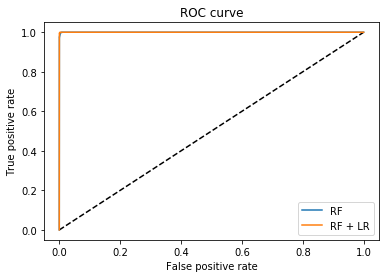

In [42]:
import matplotlib.pyplot as plt
# 將結果繪圖
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lr, tpr_rf_lr, label='RF + LR')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [43]:
# 將隨機森林+葉編碼+邏輯斯迴歸結果輸出
pred_rf_lr = lr.predict_proba(onehot.transform(rf.apply(val_x)))#[:, 1]
fpr_rf_lr, tpr_rf_lr, _ = roc_curve(val_y, pred_rf_lr[:, 1])

# 將隨機森林結果輸出
pred_rf = rf.predict_proba(val_x)#[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(val_y, pred_rf[:, 1])

auc_score = roc_auc_score(y_true=val_y.Y1, y_score=pred_rf_lr[:, 1])
acc = accuracy_score(y_true=val_y.Y1, y_pred=pred_rf_lr.argmax(axis=1))
print('Validation AUC: {:.3f}, Accuracy: {:.3f}'.format(auc_score, acc)) #0.967 / 0.9  #0.947 / 0.982

auc_score = roc_auc_score(y_true=val_y.Y1, y_score=pred_rf[:, 1])
acc = accuracy_score(y_true=val_y.Y1, y_pred=pred_rf.argmax(axis=1))
print('Validation AUC: {:.3f}, Accuracy: {:.3f}'.format(auc_score, acc))

crossv_lrRfc = cross_val_score(lr, onehot.transform(rf.apply(train_X_values)), train_Y, cv=10, scoring='roc_auc')
crossv_lrRfc
print(crossv_lrRfc.mean())

Validation AUC: 1.000, Accuracy: 1.000
Validation AUC: 1.000, Accuracy: 0.999


array([0.99999031, 0.9999949 , 0.99999847, 1.        , 1.        ,
       1.        , 1.        , 0.99998469, 0.99991173, 0.9999949 ])

0.9999875000000001


In [45]:
test_Y_pred = lr.predict_proba(onehot.transform(rf.apply(test_x)))
df_test['predict_proba'] = test_Y_pred[:, 1]
print(df_test.shape)
df_test

(150000, 132)


CUS_ID GENDER AGE CHARGE_CITY_CD CONTACT_CITY_CD  EDUCATION_CD  \
0          1193      M   低             A1              A1           2.0   
1          1727      M   低             A1              A1           NaN   
2          3293      M   低             A1              A1           1.0   
3          4328      M   低             A1              A1           NaN   
4          5555      M   低             A1              A1           1.0   
...         ...    ...  ..            ...             ...           ...   
149995  2074085      F  中高             A1              A1           3.0   
149996  2095927      F   高             B1              B1           3.0   
149997  2125973      M   高             C1              C1           3.0   
149998  2511714      F   高              D               D           3.0   
149999  2558094      F   高              D              A1           1.0   

        MARRIAGE_CD LAST_A_CCONTACT_DT  L1YR_A_ISSUE_CNT LAST_A_ISSUE_DT  ...  \
0               0.0                  Y                 4               Y  ...   
1               0.0                  N                 0               N  ...   
2               0.0                  N                 0               N  ...   
3               0.0                  N                 0               N  ...   
4               0.0                  Y                 0               Y  ...   
...             ...                ...               ...             ...  ...   
149995          0.0                  Y                 0               N  ...   
149996          1.0                  Y                 1               Y  ...   
149997          1.0                  Y                 0               N  ...   
149998          1.0                  Y                 0               N  ...   
149999          1.0                  N                 0               N  ...   

        L1YR_GROSS_PRE_AMT CUST_9_SEGMENTS_CD  FINANCETOOLS_A  FINANCETOOLS_B  \
0                 0.000151                  C             NaN             NaN   
1                 0.000000                  C             NaN             NaN   
2                 0.000090                  C             NaN             NaN   
3                 0.000000                  C             NaN             NaN   
4                 0.000179                  C             NaN             NaN   
...                    ...                ...             ...             ...   
149995            0.000122                  G             NaN             NaN   
149996            0.000104                  G             NaN             NaN   
149997            0.000225                  G             NaN             NaN   
149998            0.000000                  H               Y               N   
149999            0.000000                  H               N               N   

        FINANCETOOLS_C  FINANCETOOLS_D  FINANCETOOLS_E FINANCETOOLS_F  \
0                  NaN             NaN             NaN            NaN   
1                  NaN             NaN             NaN            NaN   
2                  NaN             NaN             NaN            NaN   
3                  NaN             NaN             NaN            NaN   
4                  NaN             NaN             NaN            NaN   
...                ...             ...             ...            ...   
149995             NaN             NaN             NaN            NaN   
149996             NaN             NaN             NaN            NaN   
149997             NaN             NaN             NaN            NaN   
149998               N               N               N              N   
149999               N               N               N              N   

       FINANCETOOLS_G predict_proba  
0                 NaN  1.548621e-05  
1                 NaN  9.528949e-08  
2                 NaN  3.790125e-07  
3                 NaN  9.528949e-08  
4                 NaN  8.954468e-07  
...               ...           ...  
149995            N

In [46]:
output = pd.concat((df_test[['CUS_ID']], df_test['predict_proba']), axis=1)
print(output.shape)

out = output.groupby('CUS_ID', as_index=False).mean()
out = out[['CUS_ID', 'predict_proba']]
out.columns = ['CUS_ID', 'Ypred']
out.to_csv('output_191002_24_RF+LR_PCANewFeatures.csv')
out

(150000, 2)


CUS_ID         Ypred
0             3  2.216385e-07
1             5  5.150188e-06
2            20  3.149672e-07
3            48  9.528949e-08
4            49  2.216385e-07
...         ...           ...
149995  2591999  7.788760e-07
149996  2592019  2.828560e-06
149997  2592023  3.862927e-06
149998  2592034  2.573418e-06
149999  2592064  1.079865e-06

[150000 rows x 2 columns]

In [ ]:
pd.read_csv('output_190922_2_xgboost_highCoffFeature.csv')